## Apply variable transformations

In [1383]:
import numpy
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
parent_dir = os.path.abspath('../../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions.create_panel_dataset import custom_log_transform, remove_outliers
from functions.exploratory_analysis import create_scatter_plots_grid

In [1384]:
foundational_df_no_transformations = pd.read_csv('./output/foundational_no_transformations.csv')
foundational_df_no_transformations_accounts = pd.read_csv('./output/foundational_no_transformations_accounts.csv')
foundational_df_no_transformations_exiobase = pd.read_csv('./output/foundational_df_no_transformations_exiobase.csv')
foundational_df_no_transformations_accounts_exiobase = pd.read_csv('./output/foundational_no_transformations_accounts_exiobase.csv')

Plot the distribution of the energy variable

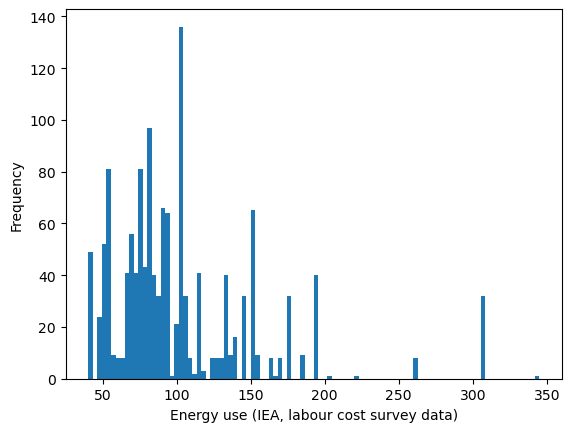

In [1385]:
plt.hist(foundational_df_no_transformations["energy"], bins=100)
plt.xlabel("Energy use (IEA, labour cost survey data)")
plt.ylabel("Frequency")
plt.show()

Same for exiobase data

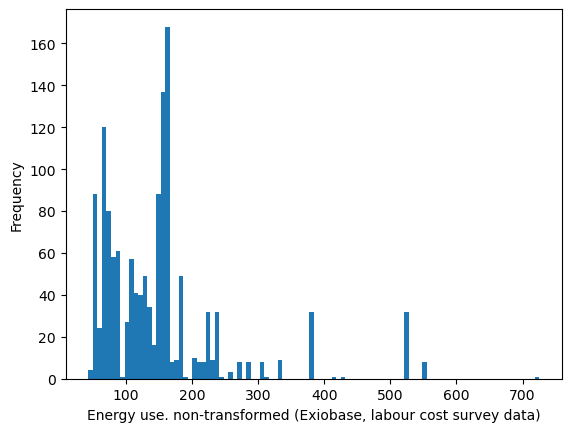

In [1386]:
plt.hist(foundational_df_no_transformations_exiobase["energy"], bins=100)
plt.xlabel("Energy use. non-transformed (Exiobase, labour cost survey data)")
plt.ylabel("Frequency")
plt.show()

In [1387]:
foundational_df_no_transformations_exiobase_sorted = foundational_df_no_transformations_exiobase.sort_values(by='energy', ascending=False)
foundational_df_no_transformations_exiobase_sorted.head(10)

,geo,TIME_PERIOD,material,other,overlooked,providential,foundational,nonfoundational,energy,ladder,...,pop100k,rail,housing,education,dietaryrisks,unsafewater,nutrideficiencies,healthessential,goveffectiveness,gini
853,LU,2020,0.162590,0.535520,0.185887,0.116002,0.278593,0.721407,725.300045,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.832707,33.4
848,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
852,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
851,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
850,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
849,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
847,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
846,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
845,LU,2016,0.168803,0.538443,0.178522,0.114233,0.283035,0.716965,551.923632,6.967,...,5.76096,72.557352,73.9,14.22752,0.112677,0.000397,0.048178,84.0,1.685422,31.7
822,LU,2012,0.168233,0.546155,0.177210,0.108402,0.276635,0.723365,524.751169,6.964,...,5.24458,71.121043,78.3,13.88231,0.122041,0.000394,0.049063,77.0,1.663306,34.3


1. Transform energy use variable to log

In [1388]:
foundational_df_transformed = foundational_df_no_transformations.copy()
# min_value = foundational_df_no_transformations["energy"].min()
# max_value = foundational_df_no_transformations["energy"].max()
foundational_df_transformed["energy"] = foundational_df_no_transformations["energy"].apply(
    # lambda x: custom_log_transform(x, min_value, max_value)
    lambda x: numpy.log(x)
)

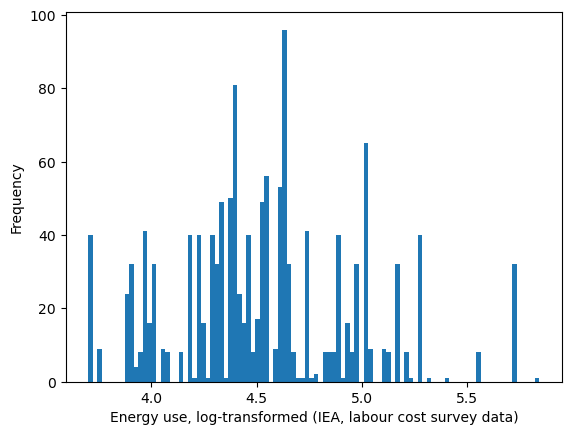

In [1389]:
plt.hist(foundational_df_transformed["energy"], bins=100)
plt.xlabel("Energy use, log-transformed (IEA, labour cost survey data)")
plt.ylabel("Frequency")
plt.show()

Same with exiobase data

In [1390]:
foundational_df_transformed_exiobase = foundational_df_no_transformations_exiobase.copy()
# pt = PowerTransformer(method='box-cox', standardize=False)
# energy_2d = foundational_df_transformed_exiobase["energy"].values.reshape(-1, 1)
# foundational_df_transformed_exiobase["energy"] = pt.fit_transform(energy_2d)
foundational_df_transformed_exiobase["energy"] = foundational_df_no_transformations_exiobase["energy"].apply(
    # lambda x: custom_log_transform(x, min_value, max_value)
    lambda x: numpy.log(x)
)

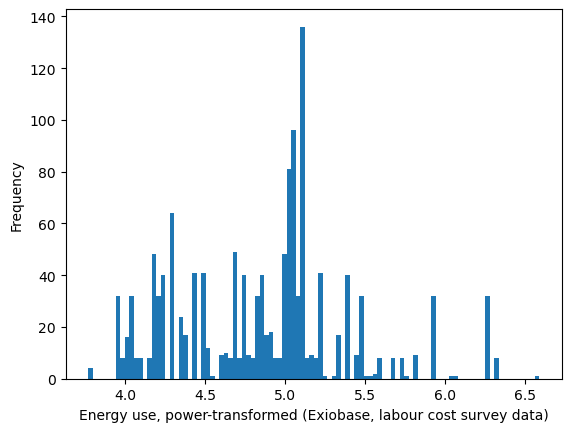

In [1391]:
plt.hist(foundational_df_transformed_exiobase["energy"], bins=100)
plt.xlabel("Energy use, power-transformed (Exiobase, labour cost survey data)")
plt.ylabel("Frequency")
plt.show()

Looks _roughly_ normally distributed now - cool

Same for accounts data

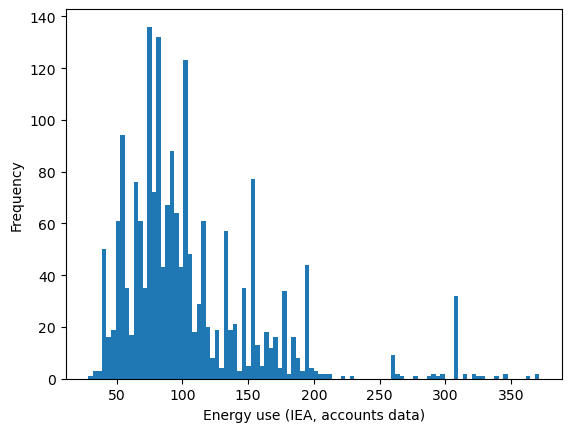

In [1392]:
plt.hist(foundational_df_no_transformations_accounts["energy"], bins=100)
plt.xlabel("Energy use (IEA, accounts data)")
plt.ylabel("Frequency")
plt.show()

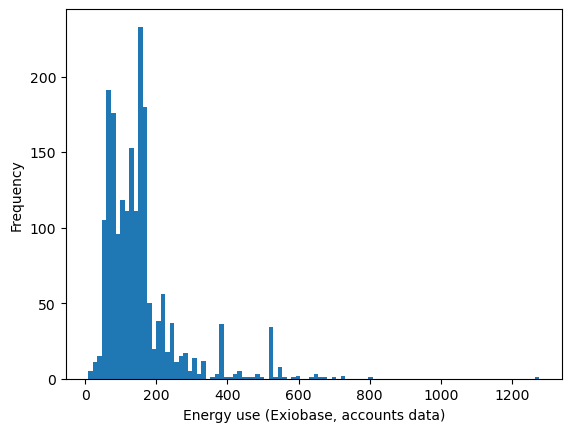

In [1393]:
plt.hist(foundational_df_no_transformations_accounts_exiobase["energy"], bins=100)
plt.xlabel("Energy use (Exiobase, accounts data)")
plt.ylabel("Frequency")
plt.show()

In [1394]:
foundational_df_transformed_accounts = foundational_df_no_transformations_accounts.copy()
# min_value = foundational_df_no_transformations_accounts["energy"].min()
# max_value = foundational_df_no_transformations_accounts["energy"].max()
foundational_df_transformed_accounts["energy"] = foundational_df_no_transformations_accounts["energy"].apply(
    # lambda x: custom_log_transform(x, min_value, max_value)
    lambda x: numpy.log(x)
)

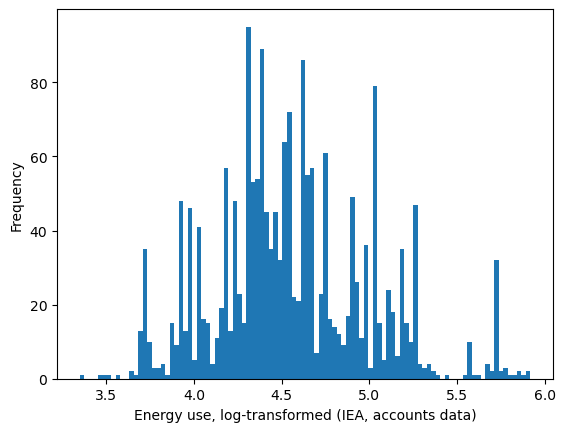

In [1395]:
plt.hist(foundational_df_transformed_accounts["energy"], bins=100)
plt.xlabel("Energy use, log-transformed (IEA, accounts data)")
plt.ylabel("Frequency")
plt.show()

In [1396]:
foundational_df_transformed_accounts_exiobase = foundational_df_no_transformations_accounts_exiobase.copy()
foundational_df_transformed_accounts_exiobase["energy"] = foundational_df_no_transformations_accounts_exiobase["energy"].apply(
    # lambda x: custom_log_transform(x, min_value, max_value)
    lambda x: numpy.log(x)
)

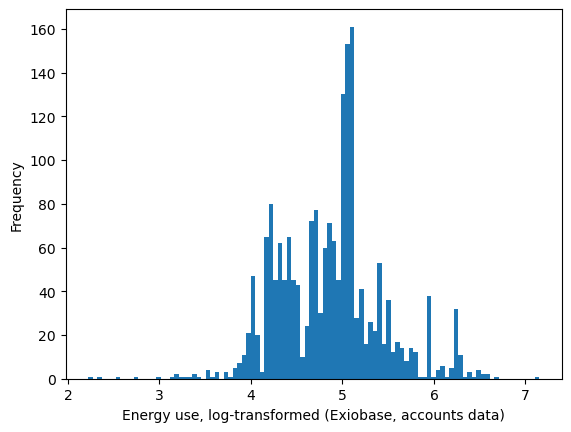

In [1397]:
plt.hist(foundational_df_transformed_accounts_exiobase["energy"], bins=100)
plt.xlabel("Energy use, log-transformed (Exiobase, accounts data)")
plt.ylabel("Frequency")
plt.show()

2. Transform need satisfaction variables using saturation transformation

First, plot the variables against energy use to see the rough distribution

Note we have two education variables now: education is UNDP expected years of schooling, schoolenr is wdi school enrollment.
The chart looks much better for UNDP, and it doesn't have values over a 100 like with WDI, so we'll go with that.

Text(0.5, 1.0, 'schoolenr vs energy (IEA, labour cost survey data)')

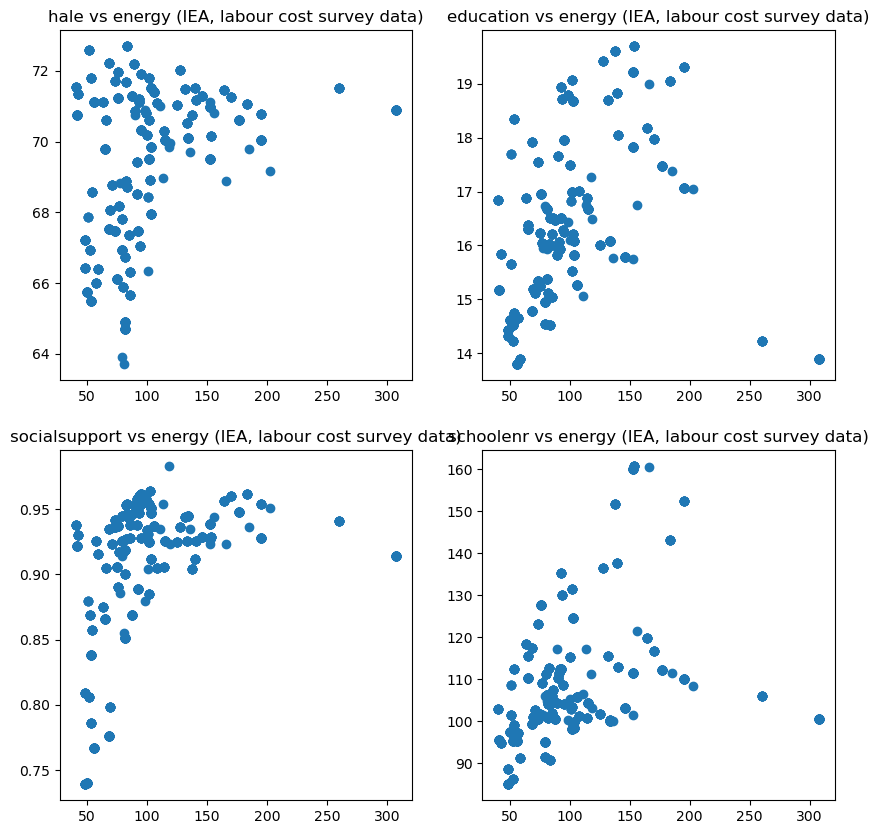

In [1398]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["hale"])
axs[0, 0].set_title('hale vs energy (IEA, labour cost survey data)')
axs[0, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["education"])
axs[0, 1].set_title('education vs energy (IEA, labour cost survey data)')
axs[1, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (IEA, labour cost survey data)')
axs[1, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (IEA, labour cost survey data)')

Text(0.5, 1.0, 'schoolenr vs energy (Exiobase, labour cost survey data)')

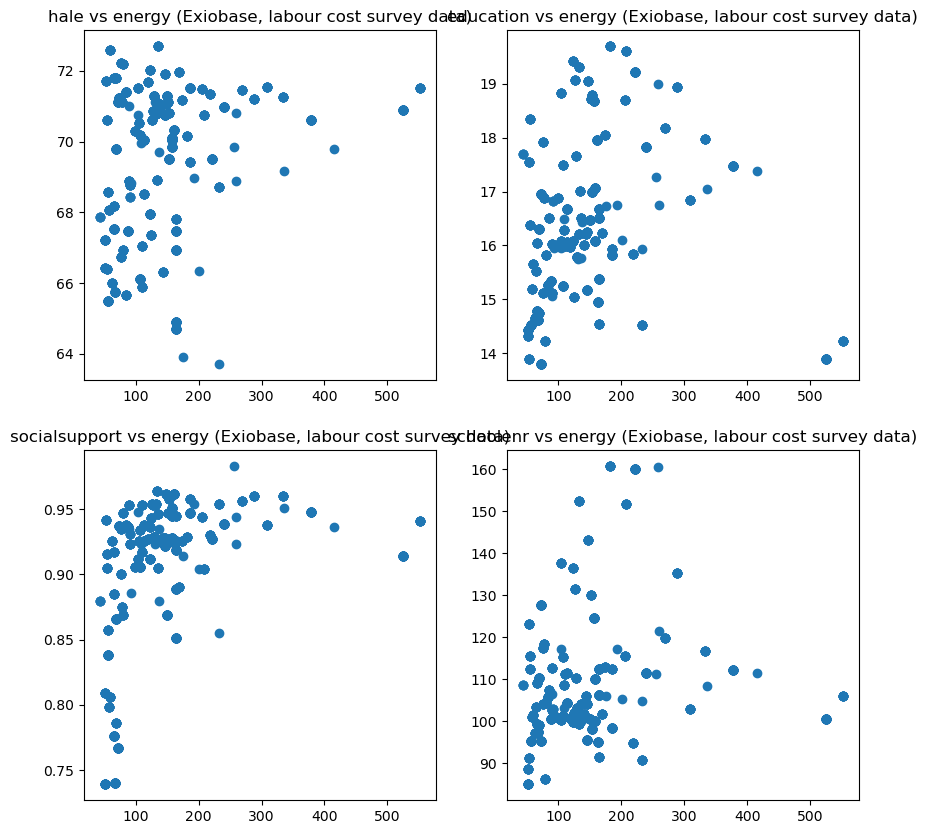

In [1399]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_exiobase["energy"], foundational_df_no_transformations_exiobase["hale"])
axs[0, 0].set_title('hale vs energy (Exiobase, labour cost survey data)')
axs[0, 1].scatter(foundational_df_no_transformations_exiobase["energy"], foundational_df_no_transformations_exiobase["education"])
axs[0, 1].set_title('education vs energy (Exiobase, labour cost survey data)')
axs[1, 0].scatter(foundational_df_no_transformations_exiobase["energy"], foundational_df_no_transformations_exiobase["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (Exiobase, labour cost survey data)')
axs[1, 1].scatter(foundational_df_no_transformations_exiobase["energy"], foundational_df_no_transformations_exiobase["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (Exiobase, labour cost survey data)')

Same for accounts data

Text(0.5, 1.0, 'schoolenr vs energy (IEA, accounts data)')

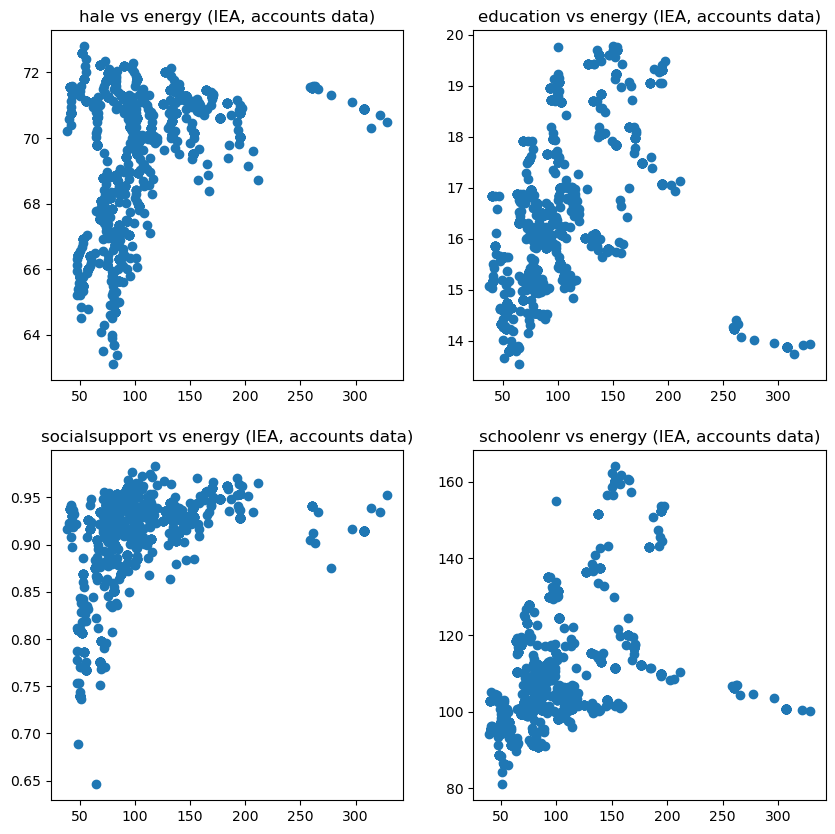

In [1400]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["hale"])
axs[0, 0].set_title('hale vs energy (IEA, accounts data)')
axs[0, 1].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["education"])
axs[0, 1].set_title('education vs energy (IEA, accounts data)')
axs[1, 0].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (IEA, accounts data)')
axs[1, 1].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (IEA, accounts data)')

Text(0.5, 1.0, 'schoolenr vs energy (Exiobase, accounts data)')

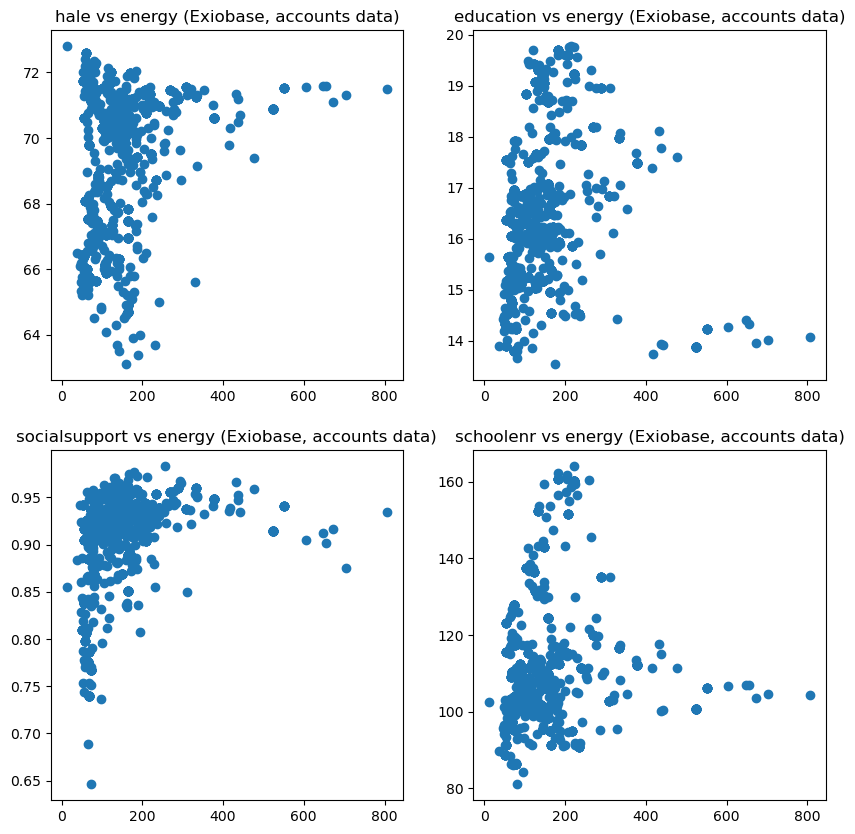

In [1401]:
ig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_accounts_exiobase["energy"], foundational_df_no_transformations_accounts_exiobase["hale"])
axs[0, 0].set_title('hale vs energy (Exiobase, accounts data)')
axs[0, 1].scatter(foundational_df_no_transformations_accounts_exiobase["energy"], foundational_df_no_transformations_accounts_exiobase["education"])
axs[0, 1].set_title('education vs energy (Exiobase, accounts data)')
axs[1, 0].scatter(foundational_df_no_transformations_accounts_exiobase["energy"], foundational_df_no_transformations_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (Exiobase, accounts data)')
axs[1, 1].scatter(foundational_df_no_transformations_accounts_exiobase["energy"], foundational_df_no_transformations_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (Exiobase, accounts data)')

Looks like there's definitely one outlier here in the low energy value range. Let's remove it 

In [1402]:
foundational_df_no_transformations_accounts_exiobase

,geo,TIME_PERIOD,material,other,overlooked,providential,foundational,nonfoundational,energy,ladder,...,pop100k,rail,housing,education,dietaryrisks,unsafewater,nutrideficiencies,healthessential,goveffectiveness,gini
0,AT,1995,0.196865,0.584168,0.108970,0.109996,0.306861,0.693139,121.866724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT,1996,0.197065,0.582858,0.105658,0.114420,0.311485,0.688515,138.776108,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.731650,29.3
2,AT,1997,0.196480,0.584765,0.105132,0.113623,0.310103,0.689897,156.163791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT,1998,0.197430,0.586049,0.105004,0.111517,0.308947,0.691053,170.375355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.803506,31.3
4,AT,1999,0.200706,0.586324,0.103236,0.109734,0.310440,0.689560,170.027404,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,SK,2020,0.205988,0.625654,0.075124,0.093234,0.299223,0.700777,233.285723,6.519,...,NaN,NaN,93.3,14.51304,0.221653,0.000388,0.083846,82.0,0.537020,NaN
2004,SK,2020,0.205988,0.625654,0.075124,0.093234,0.299223,0.700777,233.285723,6.519,...,NaN,NaN,93.3,14.51304,0.221653,0.000388,0.083846,82.0,0.537020,NaN
2005,SK,2020,0.205988,0.625654,0.075124,0.093234,0.299223,0.700777,233.285723,6.519,...,NaN,NaN,93.3,14.51304,0.221653,0.000388,0.083846,82.0,0.537020,NaN
2006,SK,2021,0.203383,0.626985,0.074265,0.095367,0.298750,0.701250,194.000779,6.419,...,NaN,NaN,NaN,14.51304,NaN,NaN,NaN,82.0,0.529207,NaN


For distributions that look like they get saturated at a certain point, check the maximum values to determine the threshold.

In [1403]:
hale_maximum = max(foundational_df_no_transformations["hale"])
socialsupport_maximum = max(foundational_df_no_transformations["socialsupport"])
education_maximum = max(foundational_df_no_transformations["education"])
print(f"Maximum values: hale {hale_maximum}, socialsupport {socialsupport_maximum}, education {education_maximum}")

Maximum values: hale 72.7, socialsupport 0.983, education 19.69990921


In [1404]:
communicable_maximum = max(foundational_df_no_transformations["communicable"].dropna())
hospitalbeds_maximum = max(foundational_df_no_transformations["hospitalbeds"])
infantmortality_maximum = max(foundational_df_no_transformations["infantmortality"])
# pollution_maximum = max(foundational_df_no_transformations["pollution"])
railpassengers_maximum = max(foundational_df_no_transformations["rail"])
roadinjury_maximum = max(foundational_df_no_transformations["roadinjury"])
suicide_maximum = max(foundational_df_no_transformations["suicide"])
housing_maximum = max(foundational_df_no_transformations["housing"].dropna())
print(f"Maximum values: hospitalbeds {hospitalbeds_maximum}, housing {housing_maximum}, communicable {communicable_maximum}, rail {railpassengers_maximum}, suicide: {suicide_maximum}")

Maximum values: hospitalbeds 8.34, housing 93.3, communicable 9.31752899340398, rail 249.9476373390929, suicide: 37.8


In [1405]:
accountsall_maximum = max(foundational_df_no_transformations["accountsall"].dropna())
accountspoorest_maximum = max(foundational_df_no_transformations["accountspoorest"].dropna())
broadband_maximum = max(foundational_df_no_transformations["broadband"])
immunization_maximum = max(foundational_df_no_transformations["immunization"])
internet_maximum = max(foundational_df_no_transformations["internet"])
renewable_maximum = max(foundational_df_no_transformations["renewable"])
safesanitation_maximum = max(foundational_df_no_transformations["safesanitation"])
telephone_maximum = max(foundational_df_no_transformations["telephone"])
tests_maximum = max(foundational_df_no_transformations["tests"].dropna())
uppersecondary_maximum = max(foundational_df_no_transformations["uppersecondary"])

print(f"Maximum values: accountsall: {accountsall_maximum}, accountspoorest: {accountspoorest_maximum}, broadband: {broadband_maximum}, immunization: {immunization_maximum}, internet: {internet_maximum}, renewable: {renewable_maximum}, safesanitation: {safesanitation_maximum}, telephone: {telephone_maximum}, tests: {tests_maximum}, uppersecondary: {uppersecondary_maximum}")

dietaryrisks_maximum = max(foundational_df_no_transformations["dietaryrisks"])
foodinsecurity_maximum = max(foundational_df_no_transformations["foodinsecurity"].dropna())
homicides_maximum = max(foundational_df_no_transformations["homicides"])
nutrideficiencies_maximum = max(foundational_df_no_transformations["nutrideficiencies"])
povertymulti_maximum = max(foundational_df_no_transformations["povertymulti"].dropna())
povertynational_maximum = max(foundational_df_no_transformations["povertynational"])
unsafewater_maximum = max(foundational_df_no_transformations["unsafewater"])

# print(f"Maximum values: dietaryrisks: {dietaryrisks_maximum}, foodinsecurity: {foodinsecurity_maximum}, homicides: {homicides_maximum}, nutrideficiencies: {nutrideficiencies_maximum}, povertymulti: {povertymulti_maximum}, povertynational: {povertynational_maximum}, unsafewater: {unsafewater_maximum}")

Maximum values: accountsall: 100.0, accountspoorest: 100.0, broadband: 47.49841009, immunization: 99.0, internet: 98.13669867, renewable: 61.29, safesanitation: 99.8146572820038, telephone: 62.96037495, tests: 561.871276855469, uppersecondary: 90.9270706176758


In [1406]:
hale_maximum_exiobase = max(foundational_df_no_transformations_exiobase["hale"])
socialsupport_maximum_exiobase = max(foundational_df_no_transformations_exiobase["socialsupport"])
education_maximum_exiobase = max(foundational_df_no_transformations_exiobase["education"])
print(f"Maximum values: hale {hale_maximum_exiobase}, socialsupport {socialsupport_maximum_exiobase}, education {education_maximum_exiobase}")

Maximum values: hale 72.7, socialsupport 0.983, education 19.69990921


Let's also plot the distribution of the variables

Text(0.5, 1.0, 'schoolenr')

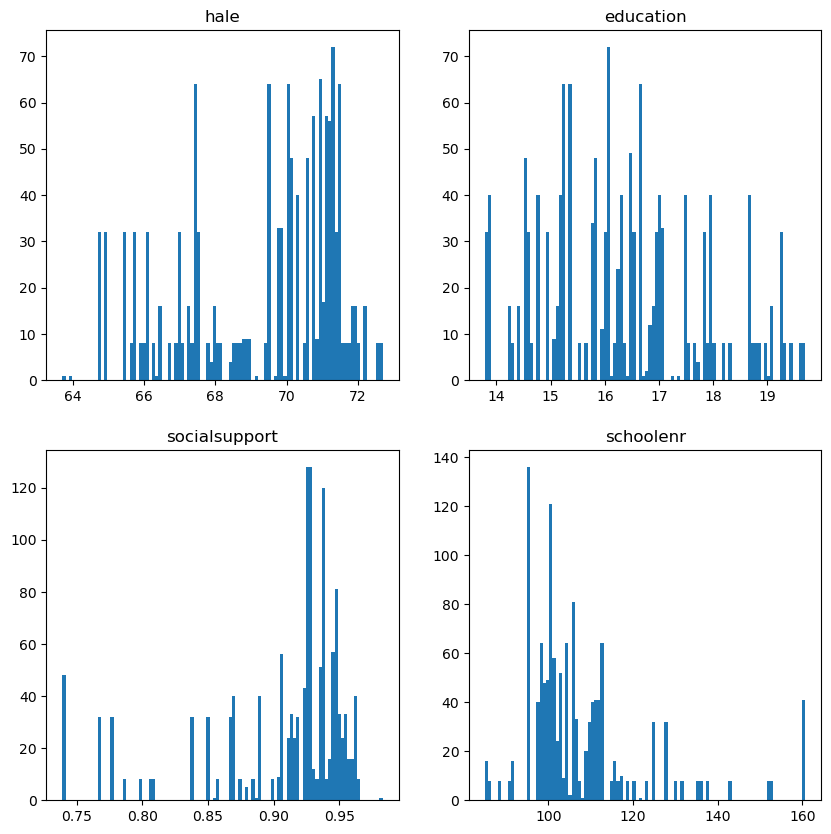

In [1407]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(foundational_df_no_transformations["hale"], bins=100)
axs[0, 0].set_title('hale')
axs[0, 1].hist(foundational_df_no_transformations["education"], bins=100)
axs[0, 1].set_title('education')
axs[1, 0].hist(foundational_df_no_transformations["socialsupport"], bins=100)
axs[1, 0].set_title('socialsupport')
axs[1, 1].hist(foundational_df_no_transformations["schoolenr"], bins=100)
axs[1, 1].set_title('schoolenr')

Text(0.5, 1.0, 'housing')

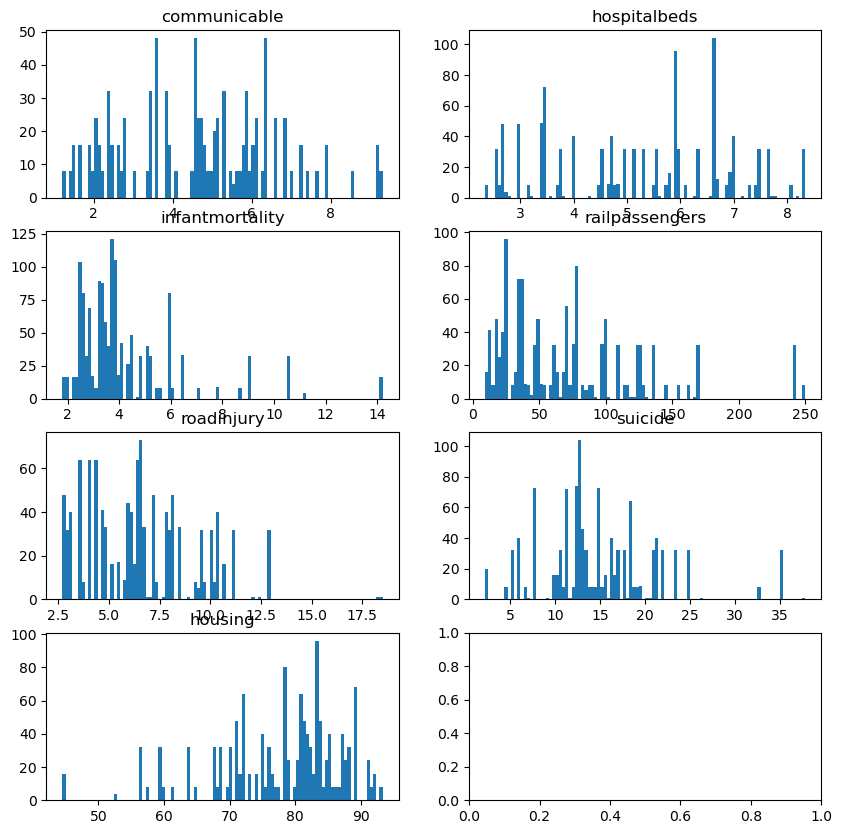

In [1408]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs[0, 0].hist(foundational_df_no_transformations["communicable"], bins=100)
axs[0, 0].set_title('communicable')
axs[0, 1].hist(foundational_df_no_transformations["hospitalbeds"], bins=100)
axs[0, 1].set_title('hospitalbeds')
axs[1, 0].hist(foundational_df_no_transformations["infantmortality"], bins=100)
axs[1, 0].set_title('infantmortality')
axs[1, 1].hist(foundational_df_no_transformations["rail"], bins=100)
axs[1, 1].set_title('railpassengers')
axs[2, 0].hist(foundational_df_no_transformations["roadinjury"], bins=100)
axs[2, 0].set_title('roadinjury')
axs[2, 1].hist(foundational_df_no_transformations["suicide"], bins=100)
axs[2, 1].set_title('suicide')
axs[3, 0].hist(foundational_df_no_transformations["housing"], bins=100)
axs[3, 0].set_title('housing')

Text(0.5, 1.0, 'uppersecondary vs energy (IEA), original')

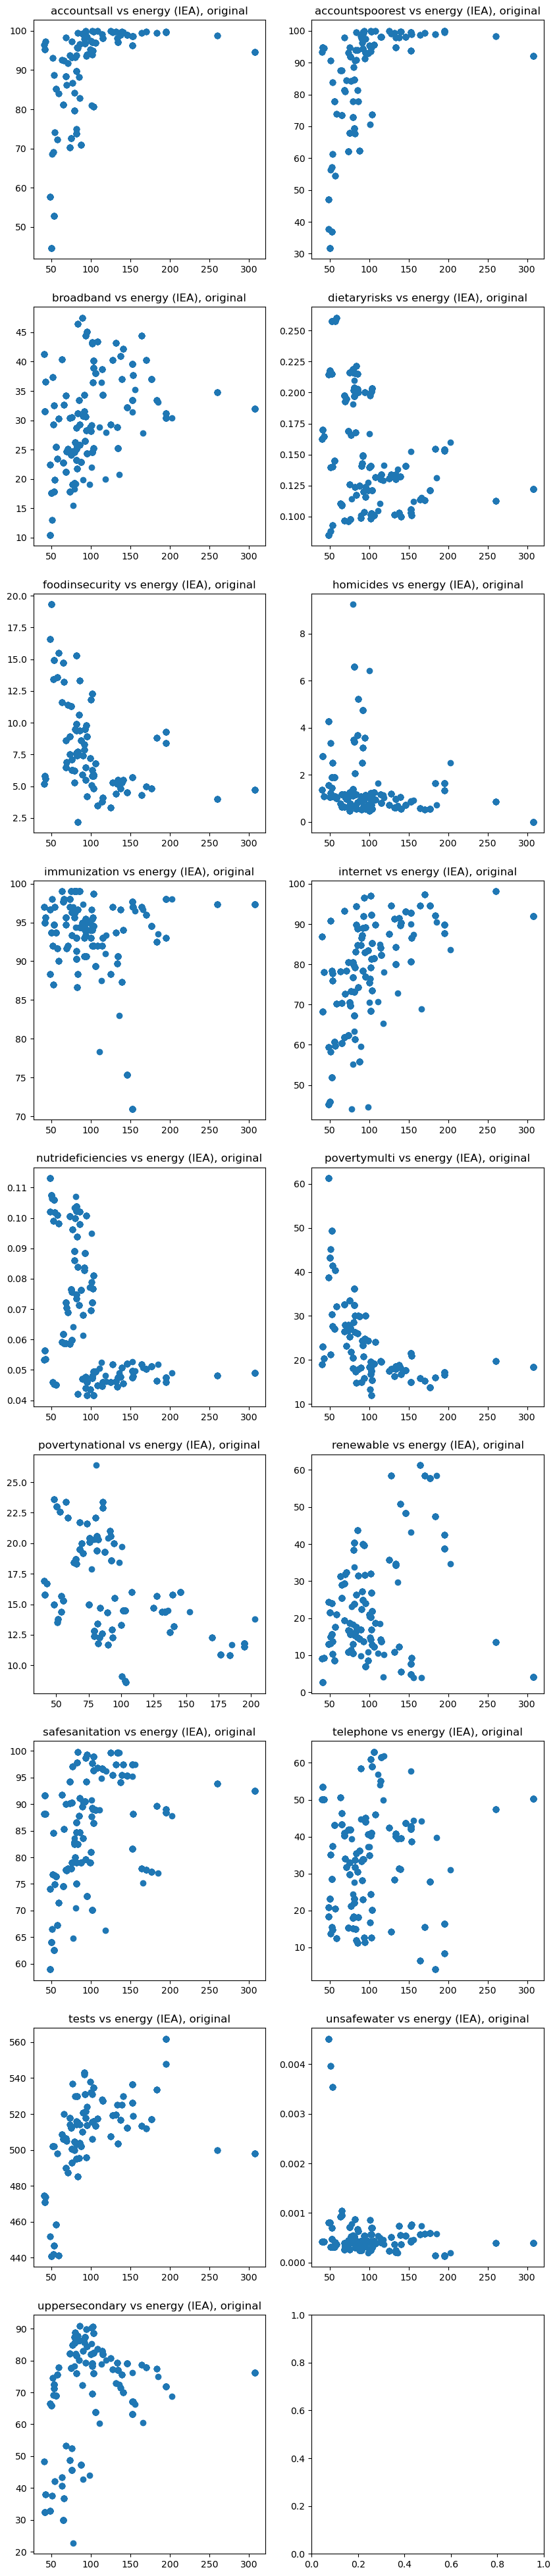

In [1409]:
fig, axs = plt.subplots(9, 2, figsize=(10, 50))
axs[0, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["accountsall"])
axs[0, 0].set_title('accountsall vs energy (IEA), original')
axs[0, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["accountspoorest"])
axs[0, 1].set_title('accountspoorest vs energy (IEA), original')
axs[1, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["broadband"])
axs[1, 0].set_title('broadband vs energy (IEA), original')
axs[1, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["dietaryrisks"])
axs[1, 1].set_title('dietaryrisks vs energy (IEA), original')
axs[2, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["foodinsecurity"])
axs[2, 0].set_title('foodinsecurity vs energy (IEA), original')
axs[2, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["homicides"])
axs[2, 1].set_title('homicides vs energy (IEA), original')
axs[3, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["immunization"])
axs[3, 0].set_title('immunization vs energy (IEA), original')
axs[3, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["internet"])
axs[3, 1].set_title('internet vs energy (IEA), original')
axs[4, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["nutrideficiencies"])
axs[4, 0].set_title('nutrideficiencies vs energy (IEA), original')
axs[4, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["povertymulti"])
axs[4, 1].set_title('povertymulti vs energy (IEA), original')
axs[5, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["povertynational"])
axs[5, 0].set_title('povertynational vs energy (IEA), original')
axs[5, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["renewable"])
axs[5, 1].set_title('renewable vs energy (IEA), original')
axs[6, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["safesanitation"])
axs[6, 0].set_title('safesanitation vs energy (IEA), original')
axs[6, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["telephone"])
axs[6, 1].set_title('telephone vs energy (IEA), original')
axs[7, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["tests"])
axs[7, 0].set_title('tests vs energy (IEA), original')
axs[7, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["unsafewater"])
axs[7, 1].set_title('unsafewater vs energy (IEA), original')
axs[8, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["uppersecondary"])
axs[8, 0].set_title('uppersecondary vs energy (IEA), original')

The education is already pretty normally distributed, but the other three are skewed. Let's try log transformation.

In [1410]:
# saturation transformations:
# accountsall
# accountspoorest
# broadband
# immunization
# internet
# renewable
# safesanitation
# telephone
# tests
# uppersecondary

In [1411]:
need_satisfaction_variables = {
    "hale": hale_maximum * 1.1,
    "education": education_maximum * 1.1,
    "socialsupport": socialsupport_maximum * 1.1,
    "hospitalbeds": hospitalbeds_maximum * 1.1,
    "housing": housing_maximum * 1.1,
    "communicable": communicable_maximum * 1.1,
    "rail": railpassengers_maximum * 1.1,
    "suicide": suicide_maximum * 1.1,
    "accountsall": accountsall_maximum * 1.1,
    "accountspoorest": accountspoorest_maximum * 1.1,
    "broadband": broadband_maximum * 1.1,
    # "immunization": immunization_maximum * 1.1,
    "internet": internet_maximum * 1.1,
    "renewable": renewable_maximum * 1.1,
    "safesanitation": safesanitation_maximum * 1.1,
    "telephone": telephone_maximum * 1.1,
    "tests": tests_maximum * 1.1,
    "uppersecondary": uppersecondary_maximum * 1.1
}
for col in need_satisfaction_variables.keys():
    if col in foundational_df_no_transformations.columns:
        foundational_df_transformed[col] = foundational_df_no_transformations[col].apply(
            lambda x: numpy.log(need_satisfaction_variables[col] - x) if x is not None and need_satisfaction_variables[col] > x else None
        )
        if foundational_df_transformed[col].isna().any():
            print(
                f"Warning: NaN values found in column {col}. Original values might be too close to or exceed the saturation point."
            )
    else:
        print(f"Warning: Column {col} not found in imputed DataFrame.")

In [1412]:
# reverse + saturation?
# dietaryrisks
# foodinsecurity
# homicides
# nutrideficiencies
# povertymulti
# povertynational
# unsafewater

In [1413]:
import numpy as np
import pandas as pd

# Assuming foundational_df_no_transformations is your original DataFrame
# Calculate the maximum values for each variable
max_infantmortality = foundational_df_no_transformations["infantmortality"].max()
max_roadinjury = foundational_df_no_transformations["roadinjury"].max()
reverse_infantmortality = 1 / foundational_df_no_transformations["infantmortality"]
reverse_roadinjury = 1 / foundational_df_no_transformations["roadinjury"]
reverse_dietaryrisks = 1 / foundational_df_no_transformations["dietaryrisks"]
reverse_foodinsecurity = 1 / foundational_df_no_transformations["foodinsecurity"]   
reverse_homicides = 1 / foundational_df_no_transformations["homicides"]
reverse_nutrideficiencies = 1 / foundational_df_no_transformations["nutrideficiencies"]
reverse_povertymulti = 1 / foundational_df_no_transformations["povertymulti"]
reverse_povertynational = 1 / foundational_df_no_transformations["povertynational"]
reverse_unsafewater = 1 / foundational_df_no_transformations["unsafewater"]
reverse_immunization = 1 / foundational_df_no_transformations["immunization"]
max_reverse_infantmortality = reverse_infantmortality.max()
max_reverse_roadinjury = reverse_roadinjury.max()
max_reverse_dietaryrisks = reverse_dietaryrisks.max()
max_reverse_foodinsecurity = reverse_foodinsecurity.max()
# remove inf and take max
max_reverse_homicides = reverse_homicides[reverse_homicides != np.inf].max()
max_reverse_nutrideficiencies = reverse_nutrideficiencies.max()
max_reverse_povertymulti = reverse_povertymulti.max()
max_reverse_povertynational = reverse_povertynational.max()
max_reverse_unsafewater = reverse_unsafewater.max()
max_reverse_immunization = reverse_immunization.max()

# Subtract original values from the maximum to invert their scale
foundational_df_transformed["infantmortality"] = reverse_infantmortality.apply(
    lambda x: numpy.log(max_reverse_infantmortality - x) if x is not None and max_reverse_infantmortality > x else None
)

foundational_df_transformed["roadinjury"] = reverse_roadinjury.apply(
    lambda x: numpy.log(max_reverse_roadinjury - x) if x is not None and max_reverse_roadinjury > x else None
)

foundational_df_transformed["dietaryrisks"] = reverse_dietaryrisks.apply(
    lambda x: numpy.log(max_reverse_dietaryrisks - x) if x is not None and max_reverse_dietaryrisks > x else None
)

foundational_df_transformed["foodinsecurity"] = reverse_foodinsecurity.apply(
    lambda x: numpy.log(max_reverse_foodinsecurity - x) if x is not None and max_reverse_foodinsecurity > x else None
)

foundational_df_transformed["homicides"] = reverse_homicides.apply(
    lambda x: numpy.log(max_reverse_homicides - x) if x is not None and max_reverse_homicides > x else None
)

foundational_df_transformed["nutrideficiencies"] = reverse_nutrideficiencies.apply(
    lambda x: numpy.log(max_reverse_nutrideficiencies - x) if x is not None and max_reverse_nutrideficiencies > x else None
)

foundational_df_transformed["povertymulti"] = reverse_povertymulti.apply(
    lambda x: numpy.log(max_reverse_povertymulti - x) if x is not None and max_reverse_povertymulti > x else None
)

foundational_df_transformed["povertynational"] = reverse_povertynational.apply(
    lambda x: numpy.log(max_reverse_povertynational - x) if x is not None and max_reverse_povertynational > x else None
)

foundational_df_transformed["unsafewater"] = reverse_unsafewater.apply(
    lambda x: numpy.log(max_reverse_unsafewater - x) if x is not None and max_reverse_unsafewater > x else None
)

foundational_df_transformed["immunization"] = reverse_immunization.apply(
    lambda x: numpy.log(max_reverse_immunization - x) if x is not None and max_reverse_immunization > x else None
)

In [1414]:
print(max_reverse_infantmortality, max_reverse_roadinjury)

0.5555555555555556 0.37037037037037035


In [1415]:
print(max_reverse_dietaryrisks, max_reverse_foodinsecurity, max_reverse_homicides, max_reverse_nutrideficiencies, max_reverse_povertymulti, max_reverse_povertynational, max_reverse_unsafewater)

11.738358922607793 0.45454545454545453 2.0900200000000013 24.049951768725286 0.08403361344537814 0.11627906976744186 7819.263137758341


In [1416]:
print(max_reverse_immunization)

0.014084507042253521


Text(0.5, 1.0, 'uppersecondary vs energy (IEA), transformed')

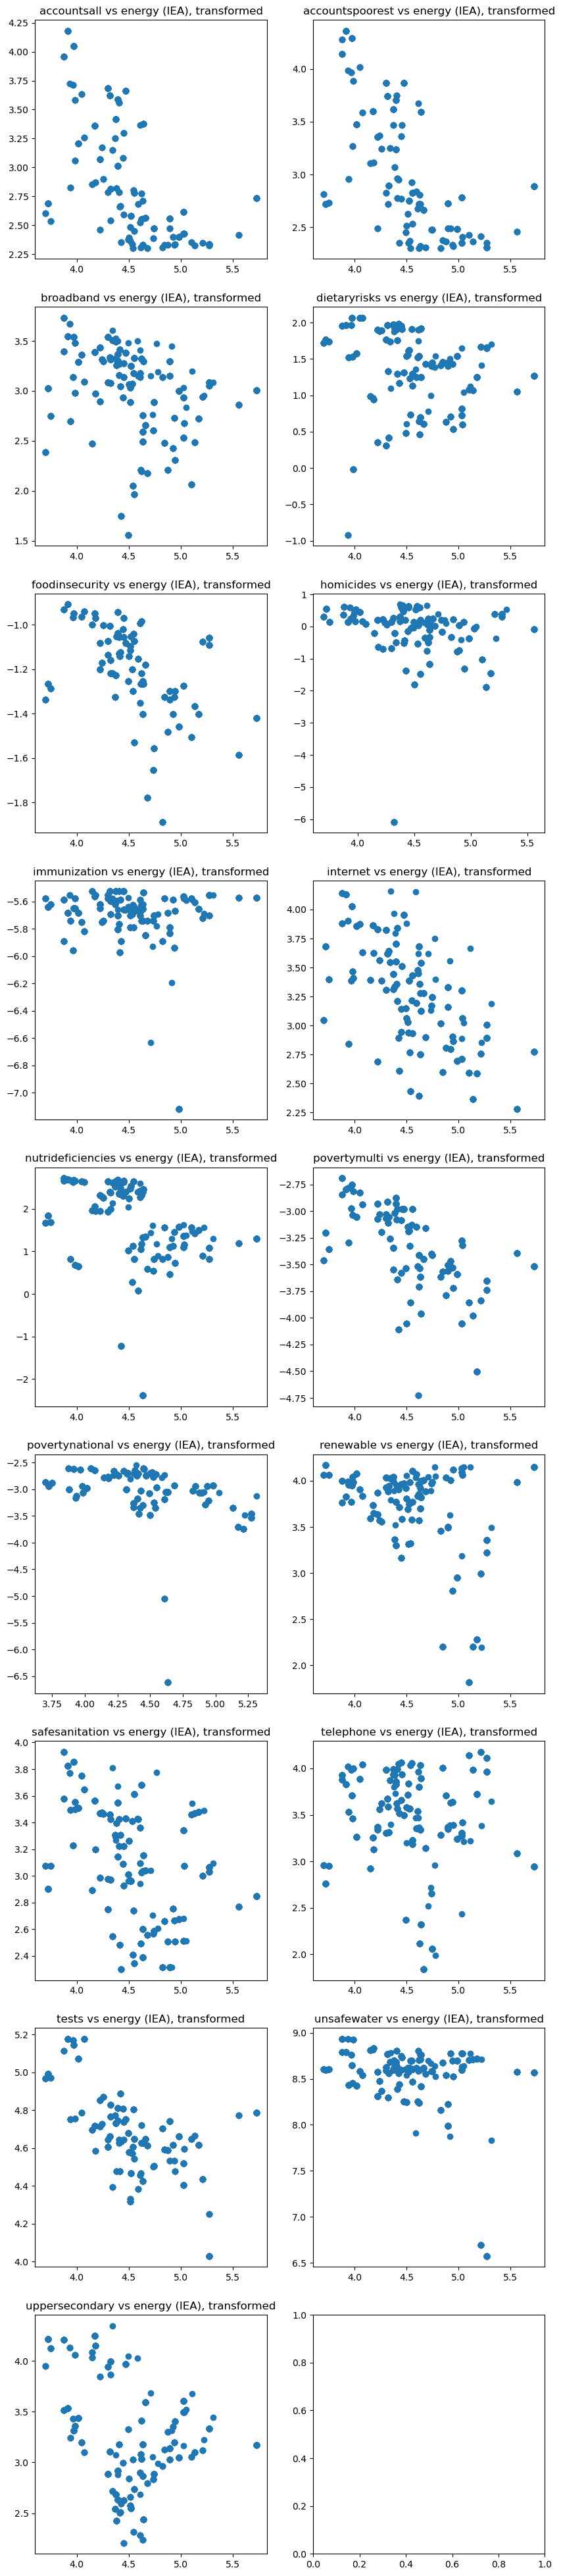

In [1417]:
fig, axs = plt.subplots(9, 2, figsize=(10, 50))
axs[0, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["accountsall"])
axs[0, 0].set_title('accountsall vs energy (IEA), transformed')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["accountspoorest"])
axs[0, 1].set_title('accountspoorest vs energy (IEA), transformed')
axs[1, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["broadband"])
axs[1, 0].set_title('broadband vs energy (IEA), transformed')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["dietaryrisks"])
axs[1, 1].set_title('dietaryrisks vs energy (IEA), transformed')
axs[2, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["foodinsecurity"])
axs[2, 0].set_title('foodinsecurity vs energy (IEA), transformed')
axs[2, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["homicides"])
axs[2, 1].set_title('homicides vs energy (IEA), transformed')
axs[3, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["immunization"])
axs[3, 0].set_title('immunization vs energy (IEA), transformed')
axs[3, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["internet"])
axs[3, 1].set_title('internet vs energy (IEA), transformed')
axs[4, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["nutrideficiencies"])
axs[4, 0].set_title('nutrideficiencies vs energy (IEA), transformed')
axs[4, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["povertymulti"])
axs[4, 1].set_title('povertymulti vs energy (IEA), transformed')
axs[5, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["povertynational"])
axs[5, 0].set_title('povertynational vs energy (IEA), transformed')
axs[5, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["renewable"])
axs[5, 1].set_title('renewable vs energy (IEA), transformed')
axs[6, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["safesanitation"])
axs[6, 0].set_title('safesanitation vs energy (IEA), transformed')
axs[6, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["telephone"])
axs[6, 1].set_title('telephone vs energy (IEA), transformed')
axs[7, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["tests"])
axs[7, 0].set_title('tests vs energy (IEA), transformed')
axs[7, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["unsafewater"])
axs[7, 1].set_title('unsafewater vs energy (IEA), transformed')
axs[8, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["uppersecondary"])
axs[8, 0].set_title('uppersecondary vs energy (IEA), transformed')

In [1418]:
# "infantmortality": infantmortality_maximum,
    # "railpassengers": railpassengers_maximum ,
    # "roadinjury": roadinjury_maximum,
    # "suicide": suicide_maximum,
# foundational_df_transformed["hospitalbeds"] = foundational_df_no_transformations["hospitalbeds"].apply(
#     # lambda x: custom_log_transform(x, min_value, max_value)
#     lambda x: numpy.log(x)
# )

# foundational_df_transformed["rail"] = foundational_df_no_transformations["rail"].apply(
#     # lambda x: custom_log_transform(x, min_value, max_value)
#     lambda x: numpy.log(x)
# )
# foundational_df_transformed["suicide"] = foundational_df_no_transformations["suicide"].apply(
#     # lambda x: custom_log_transform(x, min_value, max_value)
#     lambda x: numpy.log(x)
# )
# foundational_df_transformed["housing"] = foundational_df_no_transformations["housing"].apply(
#     # lambda x: custom_log_transform(x, min_value, max_value)
#     lambda x: numpy.log(x)
# )
# foundational_df_transformed["communicable"] = foundational_df_no_transformations["communicable"].apply(
#     # lambda x: custom_log_transform(x, min_value, max_value)
#     lambda x: numpy.log(x)
# )

In [1419]:
need_satisfaction_variables_exiobase = {
    "hale": hale_maximum_exiobase * 1.1,
    "education": education_maximum_exiobase * 1.1,
    "socialsupport": socialsupport_maximum_exiobase * 1.1,
}
for col in need_satisfaction_variables_exiobase.keys():
    if col in foundational_df_no_transformations_exiobase.columns:
        foundational_df_transformed_exiobase[col] = foundational_df_no_transformations_exiobase[col].apply(
            lambda x: numpy.log(need_satisfaction_variables_exiobase[col] - x) if x is not None and need_satisfaction_variables_exiobase[col] > x else None
        )
        if foundational_df_transformed_exiobase[col].isna().any():
            print(
                f"Warning: NaN values found in column {col}. Original values might be too close to or exceed the saturation point."
            )
    else:
        print(f"Warning: Column {col} not found in imputed DataFrame.")

In [1420]:
# inverse selected vars: infantmortality, roadinjury, communicable

Text(0.5, 1.0, 'housing')

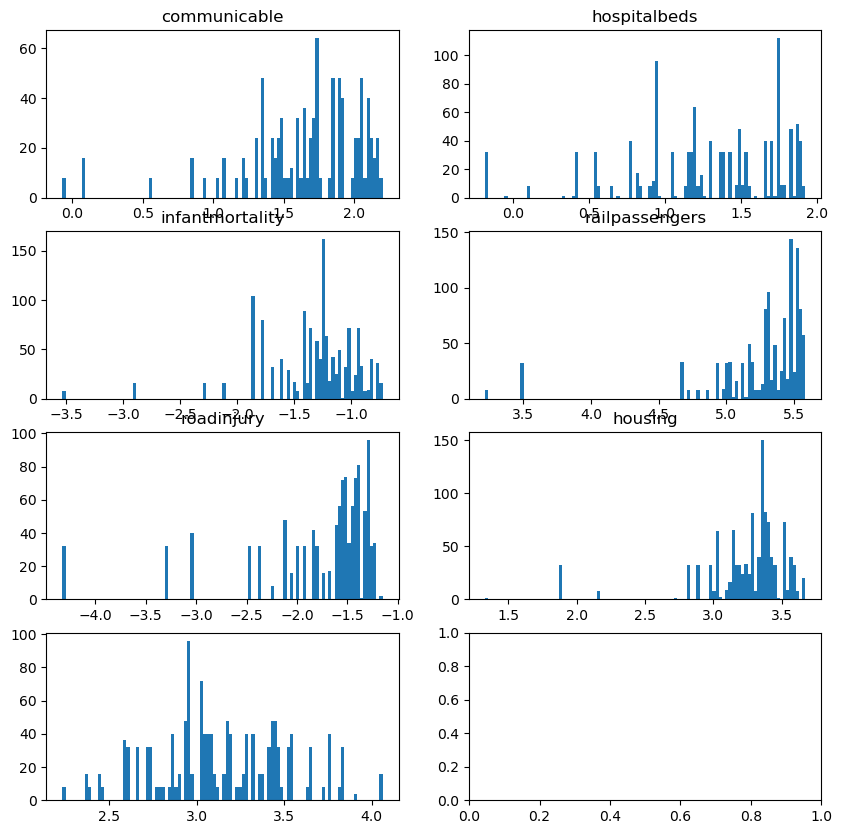

In [1421]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs[0, 0].hist(foundational_df_transformed["communicable"], bins=100)
axs[0, 0].set_title('communicable')
axs[0, 1].hist(foundational_df_transformed["hospitalbeds"], bins=100)
axs[0, 1].set_title('hospitalbeds')
axs[1, 0].hist(foundational_df_transformed["infantmortality"], bins=100)
axs[1, 0].set_title('infantmortality')
axs[1, 1].hist(foundational_df_transformed["rail"], bins=100)
axs[1, 1].set_title('railpassengers')
axs[2, 0].hist(foundational_df_transformed["roadinjury"], bins=100)
axs[2, 0].set_title('roadinjury')
axs[2, 1].hist(foundational_df_transformed["suicide"], bins=100)
axs[2, 1].set_title('suicide')
axs[3, 0].hist(foundational_df_transformed["housing"], bins=100)
axs[2, 1].set_title('housing')

Text(0.5, 1.0, 'infantmortality vs energy (IEA), transformed')

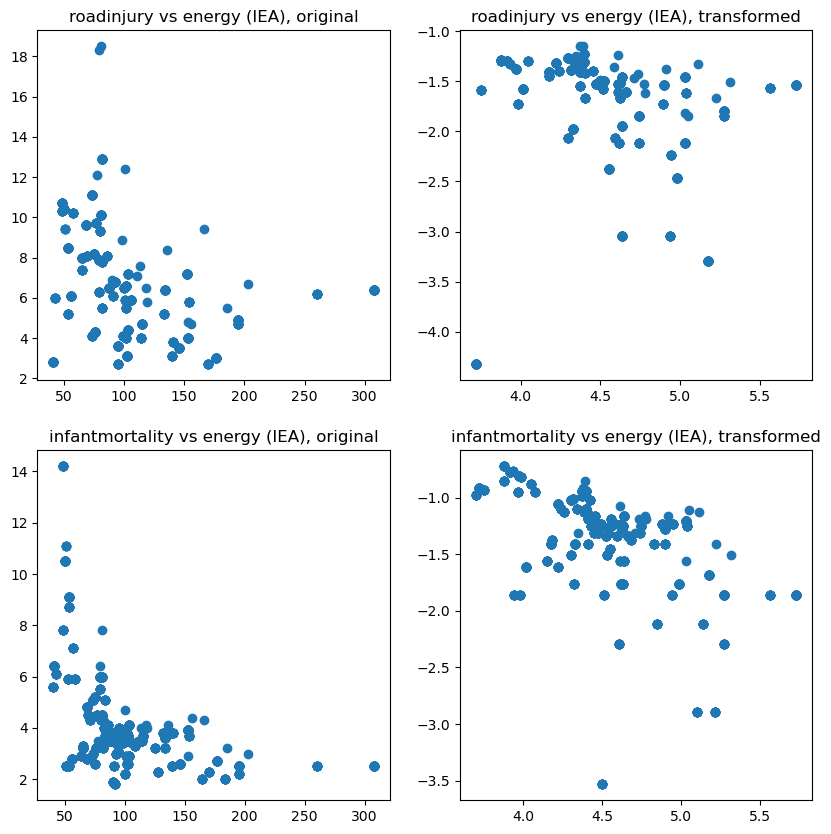

In [1422]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["roadinjury"])
axs[0, 0].set_title('roadinjury vs energy (IEA), original')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["roadinjury"])
axs[0, 1].set_title('roadinjury vs energy (IEA), transformed')
axs[1, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["infantmortality"])
axs[1, 0].set_title('infantmortality vs energy (IEA), original')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["infantmortality"])
axs[1, 1].set_title('infantmortality vs energy (IEA), transformed')

Text(0.5, 1.0, 'suicide vs energy (IEA), transformed')

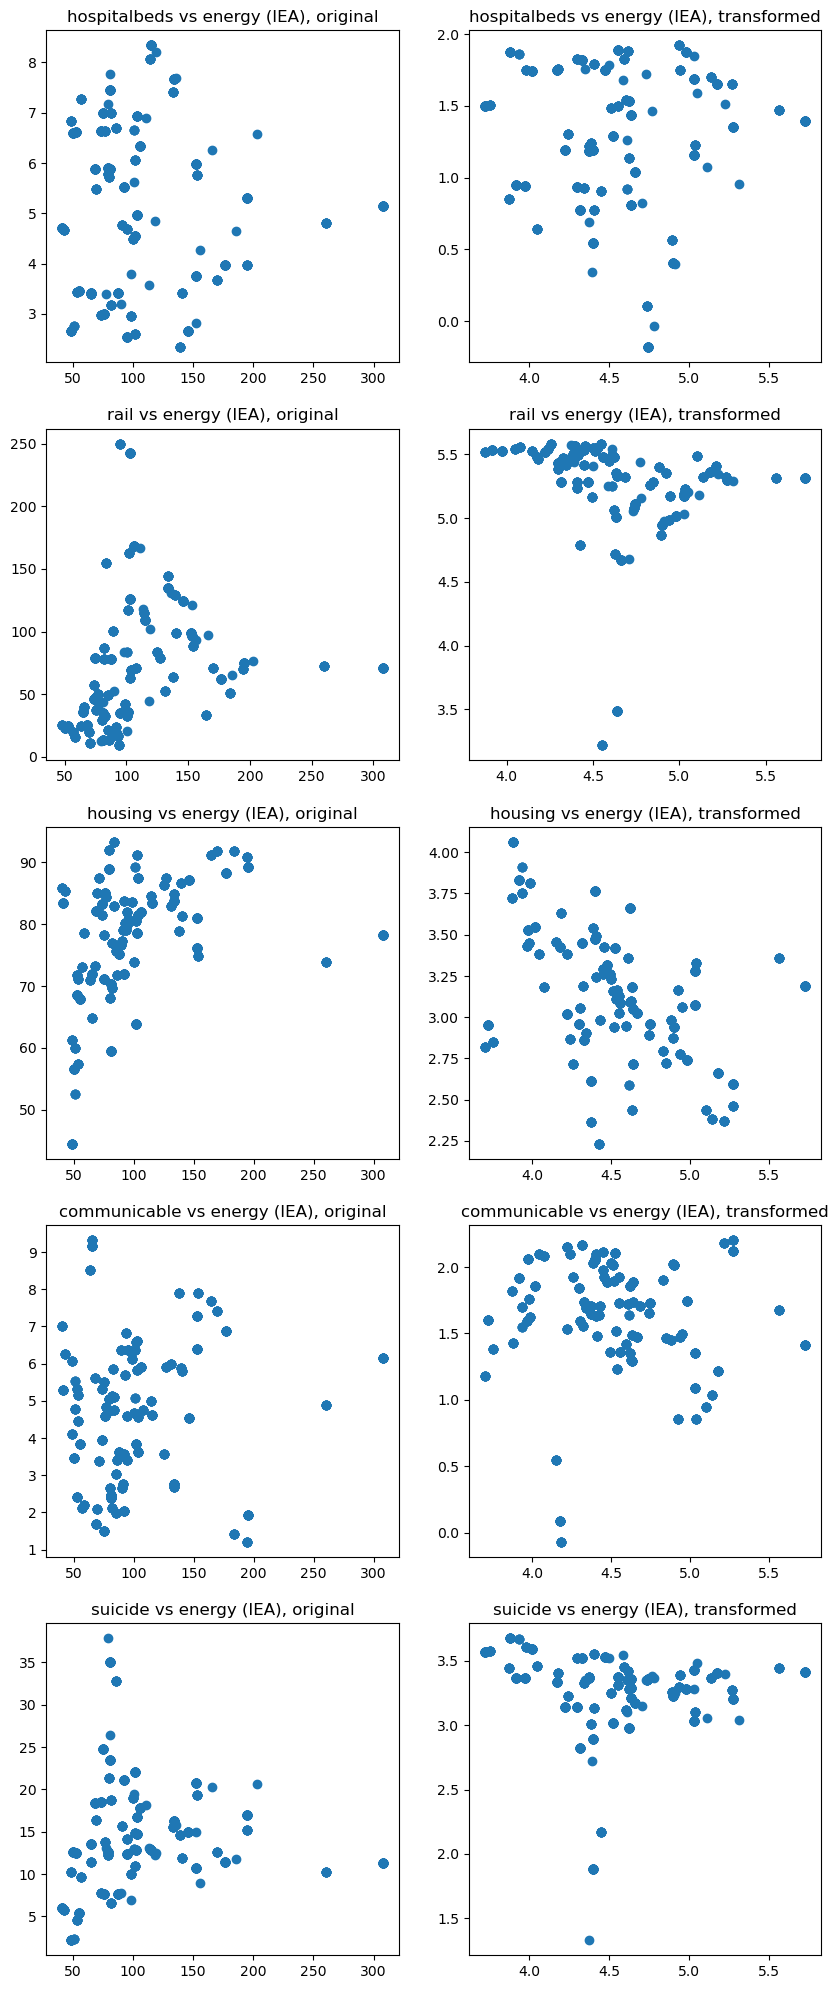

In [1423]:
fig, axs = plt.subplots(5, 2, figsize=(10, 25))
axs[0, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["hospitalbeds"])
axs[0, 0].set_title('hospitalbeds vs energy (IEA), original')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["hospitalbeds"])
axs[0, 1].set_title('hospitalbeds vs energy (IEA), transformed')
axs[1, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["rail"])
axs[1, 0].set_title('rail vs energy (IEA), original')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["rail"])
axs[1, 1].set_title('rail vs energy (IEA), transformed')
axs[2, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["housing"])
axs[2, 0].set_title('housing vs energy (IEA), original')
axs[2, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["housing"])
axs[2, 1].set_title('housing vs energy (IEA), transformed')
axs[3, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["communicable"])
axs[3, 0].set_title('communicable vs energy (IEA), original')
axs[3, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["communicable"])
axs[3, 1].set_title('communicable vs energy (IEA), transformed')
axs[4, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["suicide"])
axs[4, 0].set_title('suicide vs energy (IEA), original')
axs[4, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["suicide"])
axs[4, 1].set_title('suicide vs energy (IEA), transformed')

Text(0.5, 1.0, 'schoolenr vs energy (IEA), transformed')

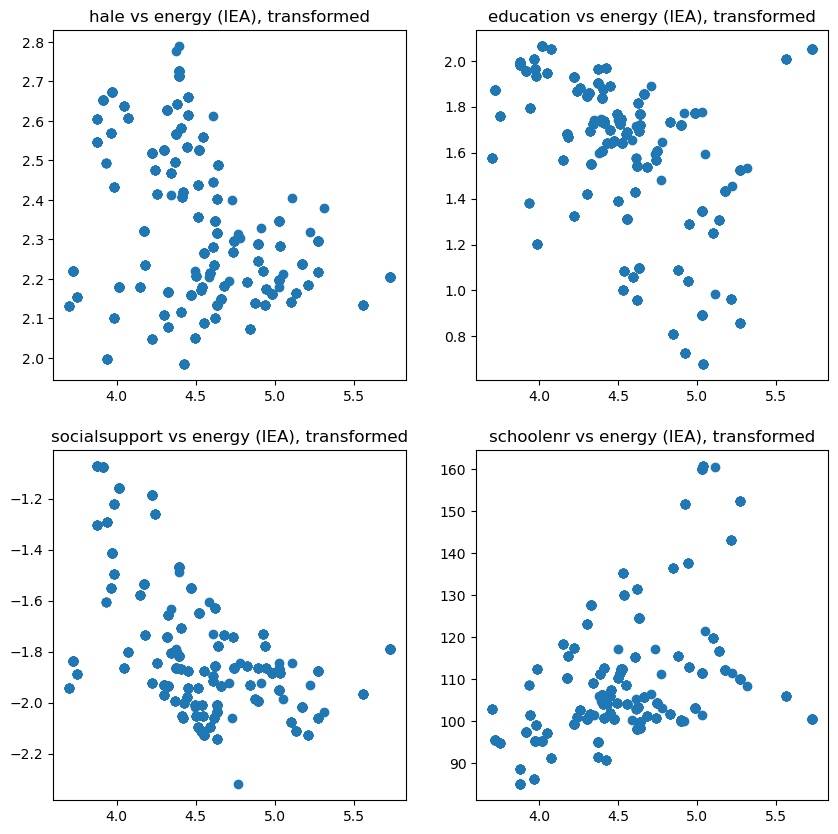

In [1424]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["hale"])
axs[0, 0].set_title('hale vs energy (IEA), transformed')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["education"])
axs[0, 1].set_title('education vs energy (IEA), transformed')
axs[1, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (IEA), transformed')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (IEA), transformed')

Text(0.5, 1.0, 'schoolenr vs energy (Exiobase), transformed')

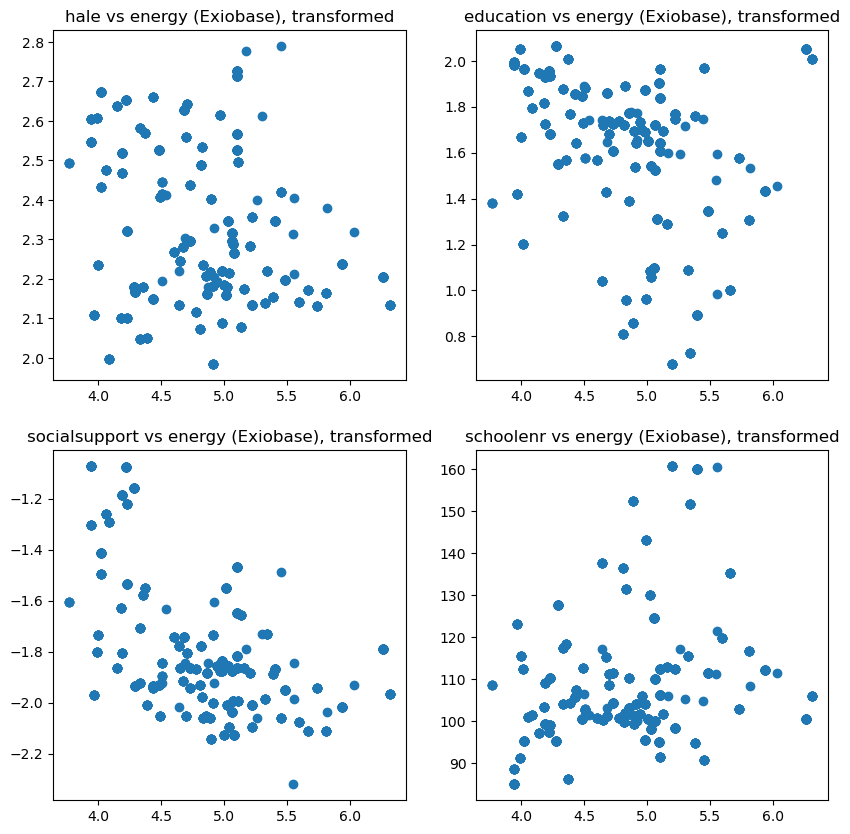

In [1425]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["hale"])
axs[0, 0].set_title('hale vs energy (Exiobase), transformed')
axs[0, 1].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["education"])
axs[0, 1].set_title('education vs energy (Exiobase), transformed')
axs[1, 0].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (Exiobase), transformed')
axs[1, 1].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (Exiobase), transformed')

Fit a linear regression and plot the residuals to see if they're normally distributed

In [1426]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1427]:
def fit_linear_regression(df, x_col, y_col):
    df = df.dropna(subset=[x_col, y_col])
    X = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    mse = mean_squared_error(y, y_pred)
    return reg, mse

In [1428]:
def plot_residuals(df, x_col, y_col):
    reg, mse = fit_linear_regression(df, x_col, y_col)
    df = df.dropna(subset=[x_col, y_col])
    X = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values.reshape(-1, 1)
    y_pred = reg.predict(X)
    residuals = y - y_pred
    plt.scatter(X, residuals)
    plt.xlabel(x_col)
    plt.ylabel("Residuals")
    plt.title(f"Residuals for {x_col} vs {y_col}")
    plt.show()
    return residuals

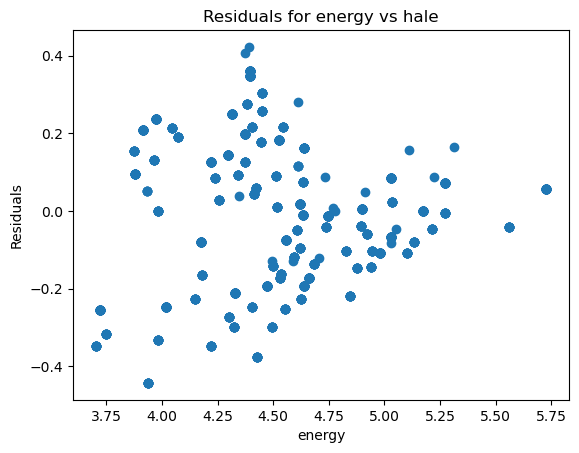

In [1429]:
residuals = plot_residuals(foundational_df_transformed, "energy", "hale")

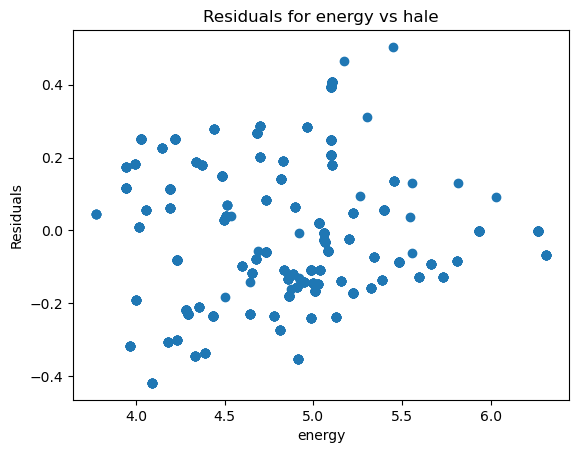

In [1430]:
residuals = plot_residuals(foundational_df_transformed_exiobase, "energy", "hale")

Text(0.5, 1.0, 'schoolenr')

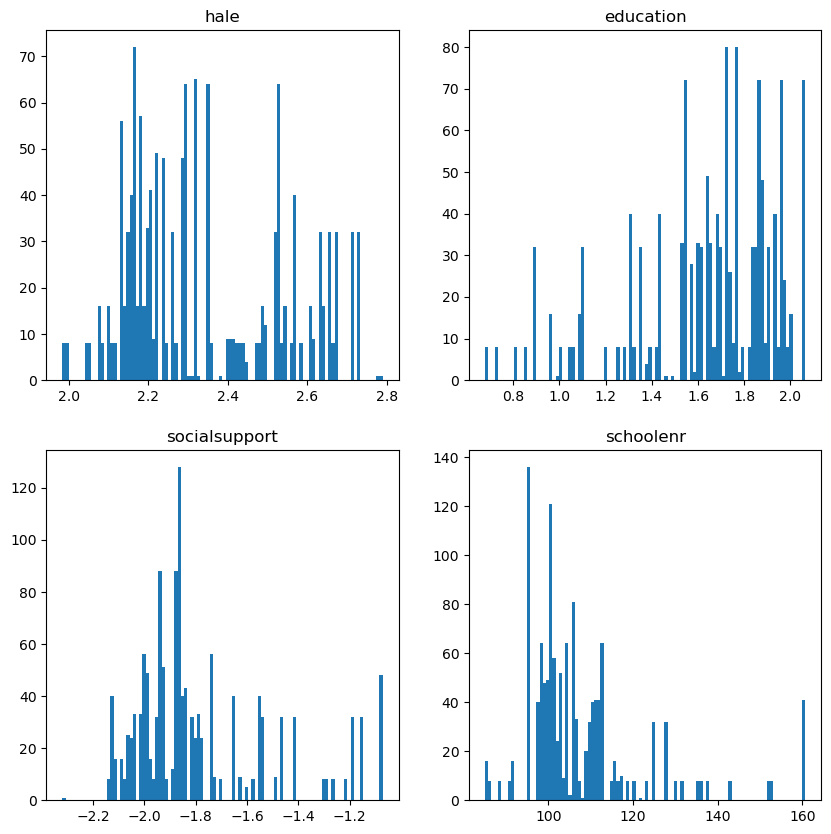

In [1431]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(foundational_df_transformed["hale"], bins=100)
axs[0, 0].set_title('hale')
axs[0, 1].hist(foundational_df_transformed["education"], bins=100)
axs[0, 1].set_title('education')
axs[1, 0].hist(foundational_df_transformed["socialsupport"], bins=100)
axs[1, 0].set_title('socialsupport')
axs[1, 1].hist(foundational_df_transformed["schoolenr"], bins=100)
axs[1, 1].set_title('schoolenr')

Doesn't look entirely linear but okay

Same for accounts data

In [1432]:
for col in need_satisfaction_variables.keys():
    if col in foundational_df_no_transformations_accounts.columns:
        foundational_df_transformed_accounts[col] = foundational_df_no_transformations_accounts[col].apply(
            lambda x: numpy.log(need_satisfaction_variables[col] - x) if x is not None and need_satisfaction_variables[col] > x else None
        )
        if foundational_df_transformed_accounts[col].isna().any():
            print(
                f"Warning: NaN values found in column {col}. Original values might be too close to or exceed the saturation point."
            )
    else:
        print(f"Warning: Column {col} not found in imputed DataFrame.")

In [1433]:
for col in need_satisfaction_variables_exiobase.keys():
    if col in foundational_df_no_transformations_accounts_exiobase.columns:
        foundational_df_transformed_accounts_exiobase[col] = foundational_df_no_transformations_accounts_exiobase[col].apply(
            lambda x: numpy.log(need_satisfaction_variables_exiobase[col] - x) if x is not None and need_satisfaction_variables_exiobase[col] > x else None
        )
        if foundational_df_transformed_accounts_exiobase[col].isna().any():
            print(
                f"Warning: NaN values found in column {col}. Original values might be too close to or exceed the saturation point."
            )
    else:
        print(f"Warning: Column {col} not found in imputed DataFrame.")

Text(0.5, 1.0, 'schoolenr vs energy (IEA), transformed')

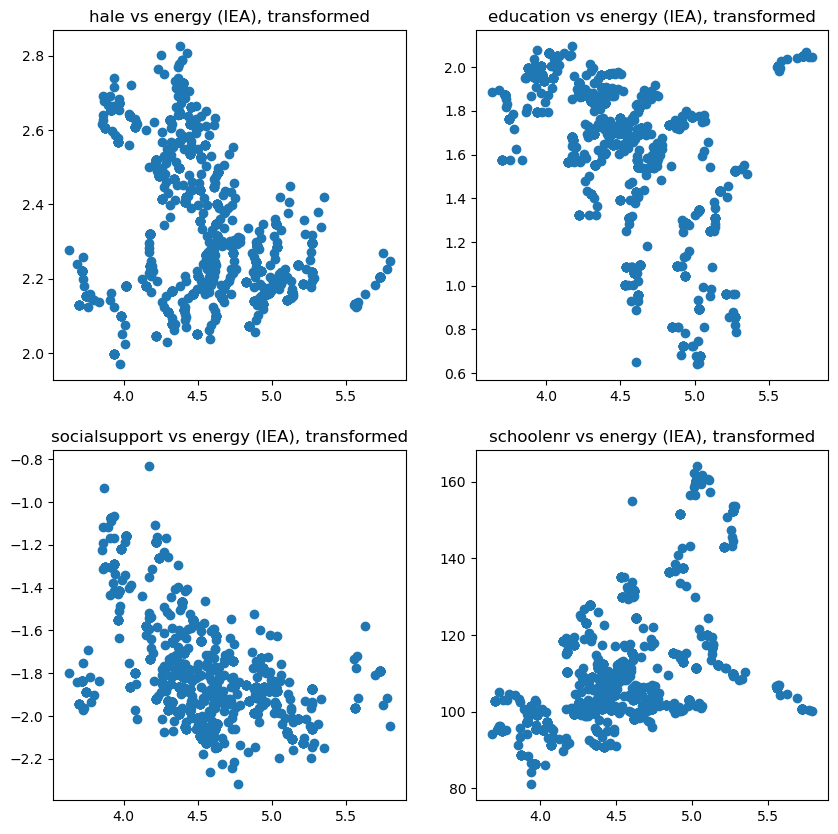

In [1434]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["hale"])
axs[0, 0].set_title('hale vs energy (IEA), transformed')
axs[0, 1].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["education"])
axs[0, 1].set_title('education vs energy (IEA), transformed')
axs[1, 0].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (IEA), transformed')
axs[1, 1].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (IEA), transformed')

Text(0.5, 1.0, 'schoolenr vs energy (Exiobase), transformed')

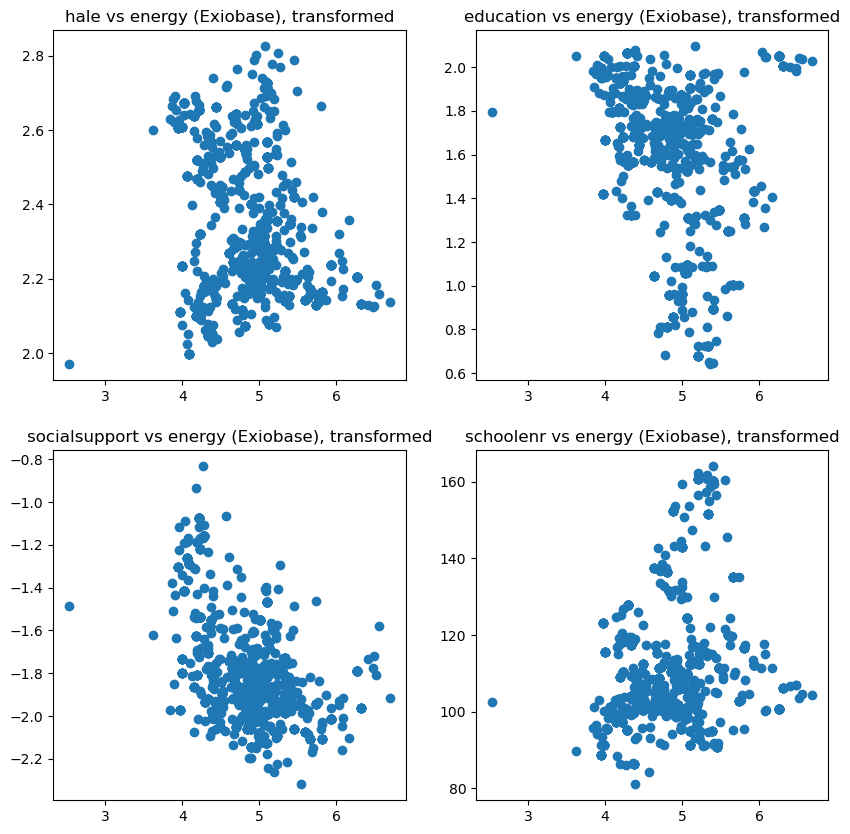

In [1435]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["hale"])
axs[0, 0].set_title('hale vs energy (Exiobase), transformed')
axs[0, 1].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["education"])
axs[0, 1].set_title('education vs energy (Exiobase), transformed')
axs[1, 0].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('socialsupport vs energy (Exiobase), transformed')
axs[1, 1].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('schoolenr vs energy (Exiobase), transformed')

Transform provisioning factors using appropriate transformations.
Not applying any transformations to foundational economy variables.

First, plot the variables against energy use to see the rough distribution

Text(0.5, 1.0, 'other vs hale')

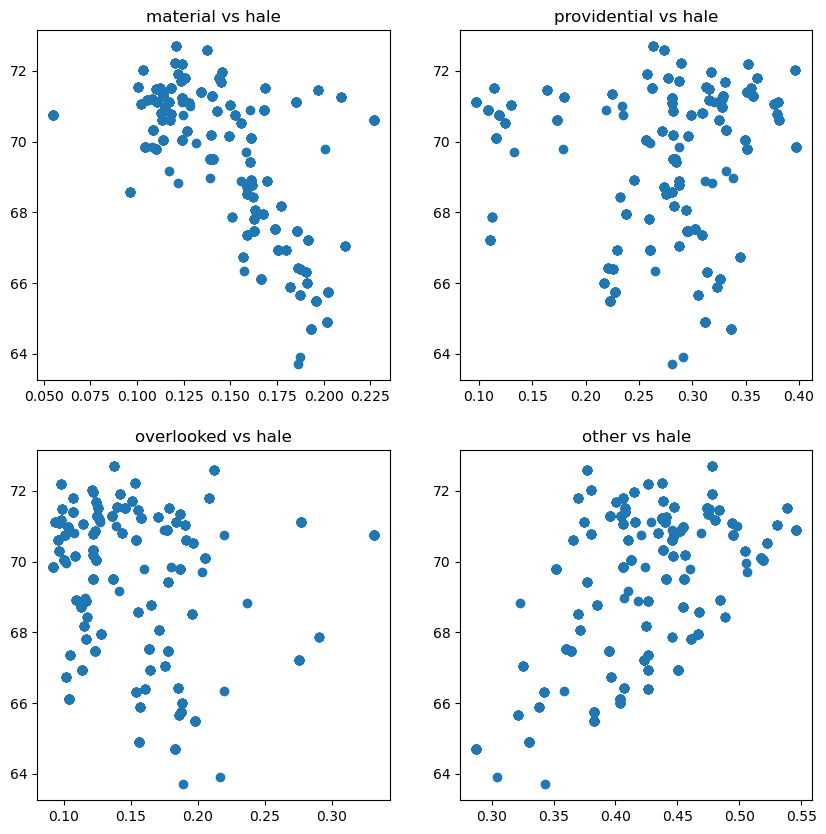

In [1436]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations["material"], foundational_df_no_transformations["hale"])
axs[0, 0].set_title('material vs hale')
axs[0, 1].scatter(foundational_df_no_transformations["providential"], foundational_df_no_transformations["hale"])
axs[0, 1].set_title('providential vs hale')
axs[1, 0].scatter(foundational_df_no_transformations["overlooked"], foundational_df_no_transformations["hale"])
axs[1, 0].set_title('overlooked vs hale')
axs[1, 1].scatter(foundational_df_no_transformations["other"], foundational_df_no_transformations["hale"])
axs[1, 1].set_title('other vs hale')

Text(0.5, 1.0, 'foundational vs hale')

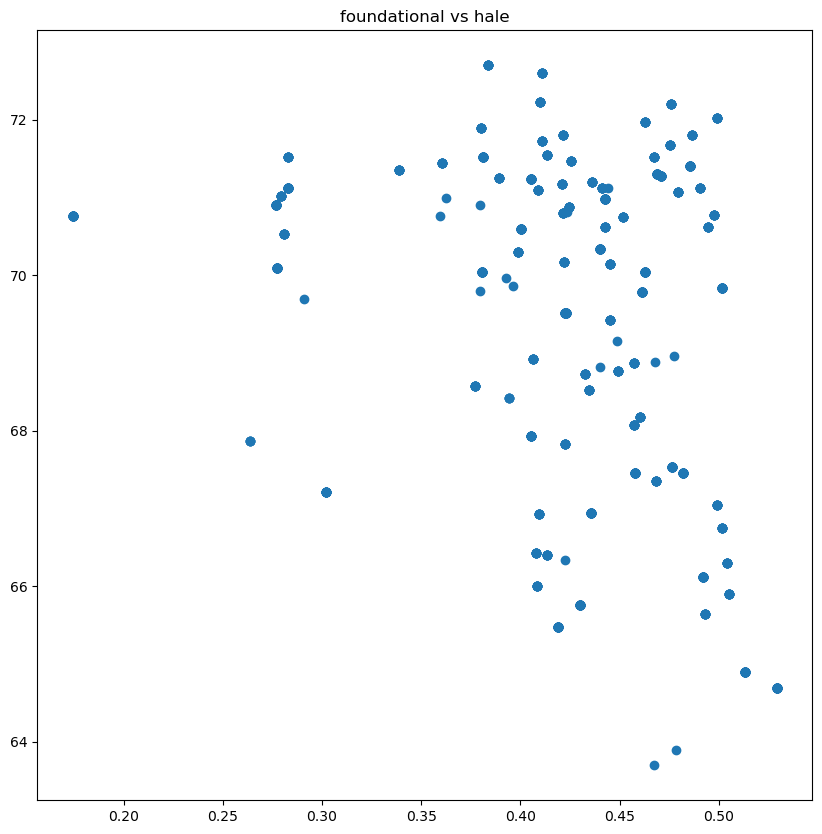

In [1437]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(foundational_df_no_transformations["foundational"], foundational_df_no_transformations["hale"])
axs.set_title('foundational vs hale')

Text(0.5, 1.0, 'foundational vs hale')

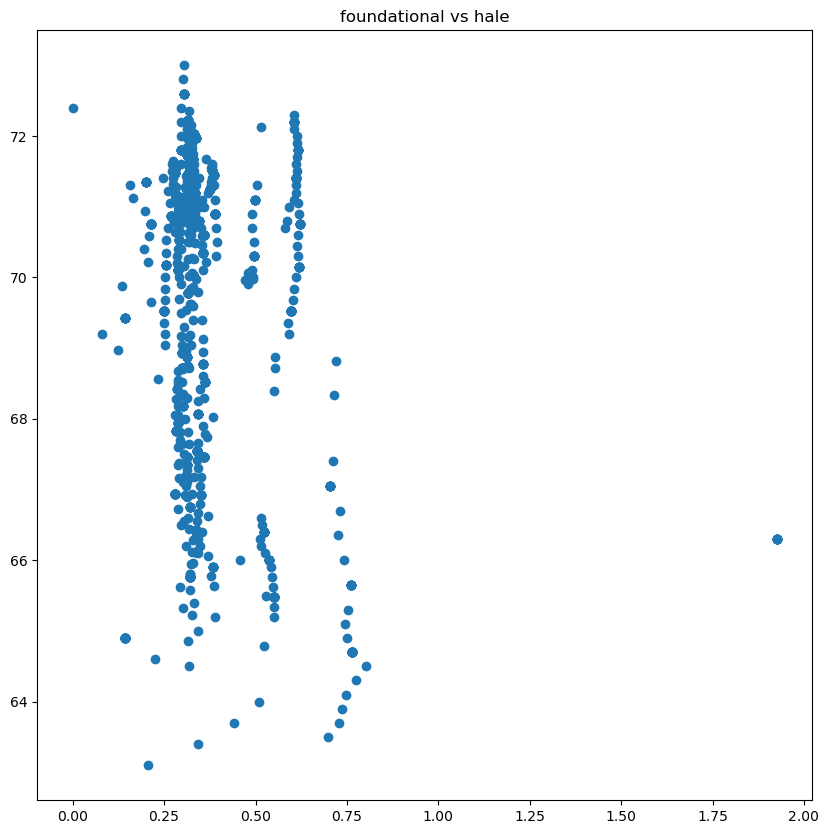

In [1438]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(foundational_df_no_transformations_accounts["foundational"], foundational_df_no_transformations_accounts["hale"])
axs.set_title('foundational vs hale')

Text(0.5, 1.0, 'providential vs energy')

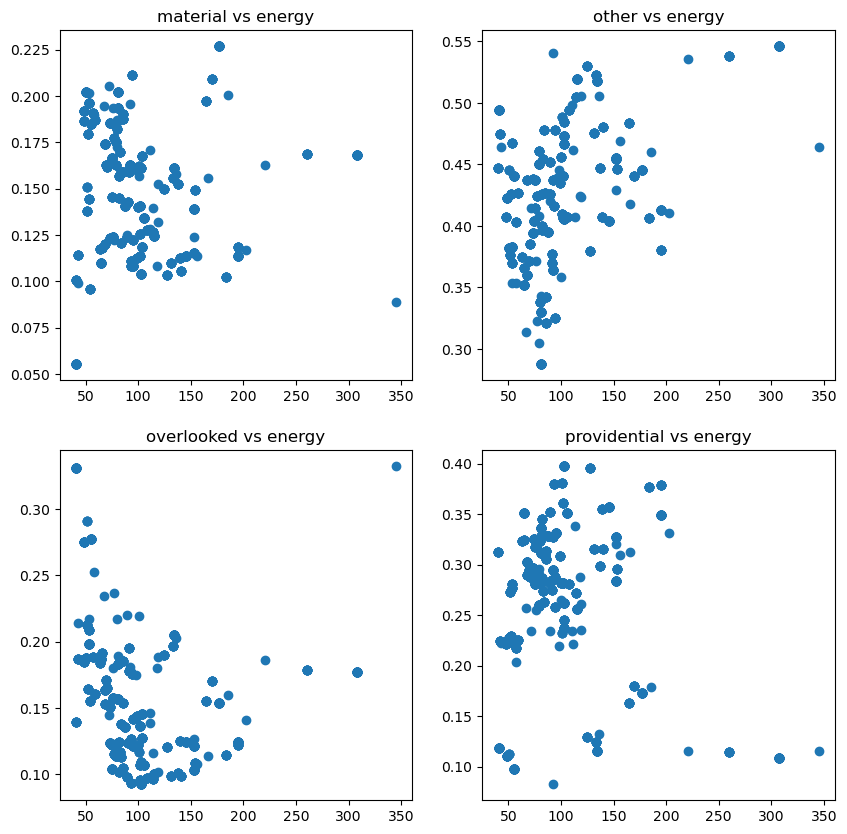

In [1439]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["material"])
axs[0, 0].set_title('material vs energy')
axs[0, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["other"])
axs[0, 1].set_title('other vs energy')
axs[1, 0].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["overlooked"])
axs[1, 0].set_title('overlooked vs energy')
axs[1, 1].scatter(foundational_df_no_transformations["energy"], foundational_df_no_transformations["providential"])
axs[1, 1].set_title('providential vs energy')

Text(0.5, 1.0, 'providential vs energy')

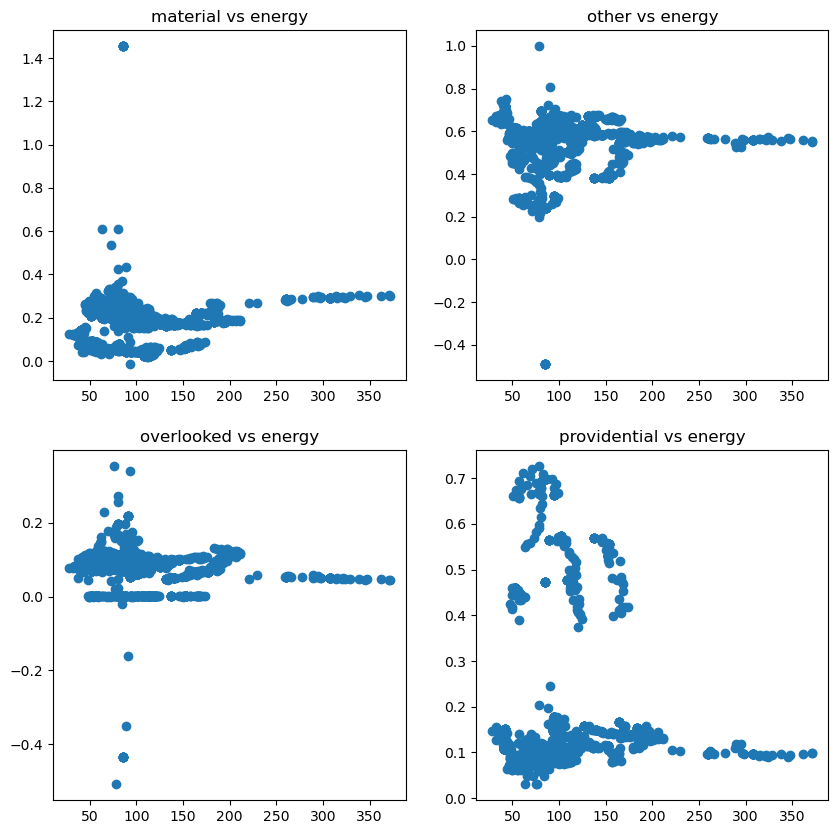

In [1440]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["material"])
axs[0, 0].set_title('material vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["other"])
axs[0, 1].set_title('other vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["overlooked"])
axs[1, 0].set_title('overlooked vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_accounts["energy"], foundational_df_no_transformations_accounts["providential"])
axs[1, 1].set_title('providential vs energy')

In [1441]:
provisioning_factor_variables = [
    "material",
    "other",
    "overlooked",
    "providential",
    "foundational",
    "nonfoundational"
]
for col in provisioning_factor_variables:
    min_value = foundational_df_no_transformations[col].min()
    max_value = foundational_df_no_transformations[col].max()
    foundational_df_transformed[col] = foundational_df_no_transformations[col].apply(
        lambda x: custom_log_transform(x, min_value, max_value)
    )

In [1442]:
for col in provisioning_factor_variables:
    # min_value = foundational_df_no_transformations_exiobase[col].min()
    # max_value = foundational_df_no_transformations_exiobase[col].max()
    foundational_df_transformed_exiobase[col] = foundational_df_no_transformations_exiobase[col].apply(
        lambda x: custom_log_transform(x, min_value, max_value)
    )

Text(0.5, 1.0, 'providential vs energy')

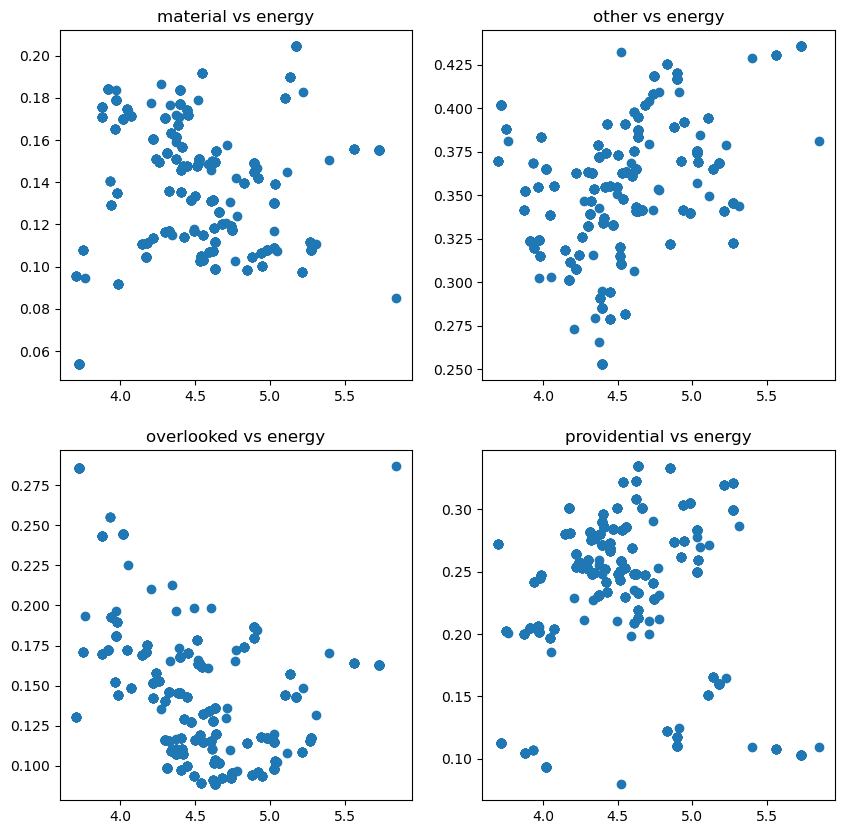

In [1443]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["material"])
axs[0, 0].set_title('material vs energy')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["other"])
axs[0, 1].set_title('other vs energy')
axs[1, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["overlooked"])
axs[1, 0].set_title('overlooked vs energy')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["providential"])
axs[1, 1].set_title('providential vs energy')

Text(0.5, 1.0, 'foundational vs hale')

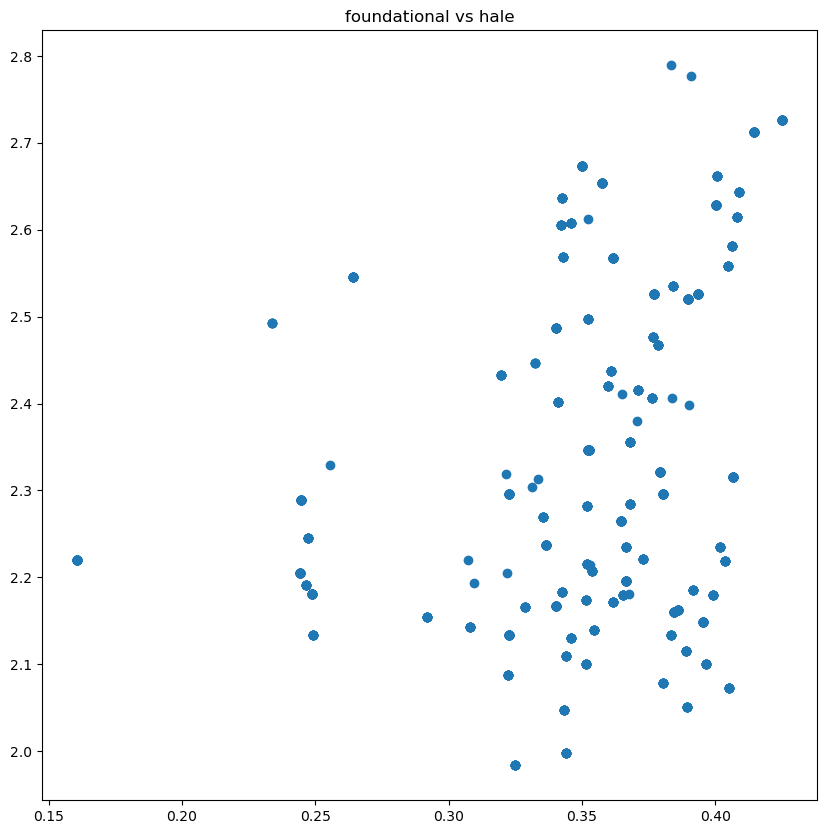

In [1444]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(foundational_df_transformed["foundational"], foundational_df_transformed["hale"])
axs.set_title('foundational vs hale')

Same for accounts data

In [1445]:
for col in provisioning_factor_variables:
    min_value = foundational_df_no_transformations_accounts[col].min()
    max_value = foundational_df_no_transformations_accounts[col].max()
    foundational_df_transformed_accounts[col] = foundational_df_no_transformations_accounts[col].apply(
        lambda x: custom_log_transform(x, min_value, max_value)
    )

In [1446]:
for col in provisioning_factor_variables:
    min_value = foundational_df_no_transformations_accounts_exiobase[col].min()
    max_value = foundational_df_no_transformations_accounts_exiobase[col].max()
    foundational_df_transformed_accounts_exiobase[col] = foundational_df_no_transformations_accounts_exiobase[col].apply(
        lambda x: custom_log_transform(x, min_value, max_value)
    )

Text(0.5, 1.0, 'providential vs energy')

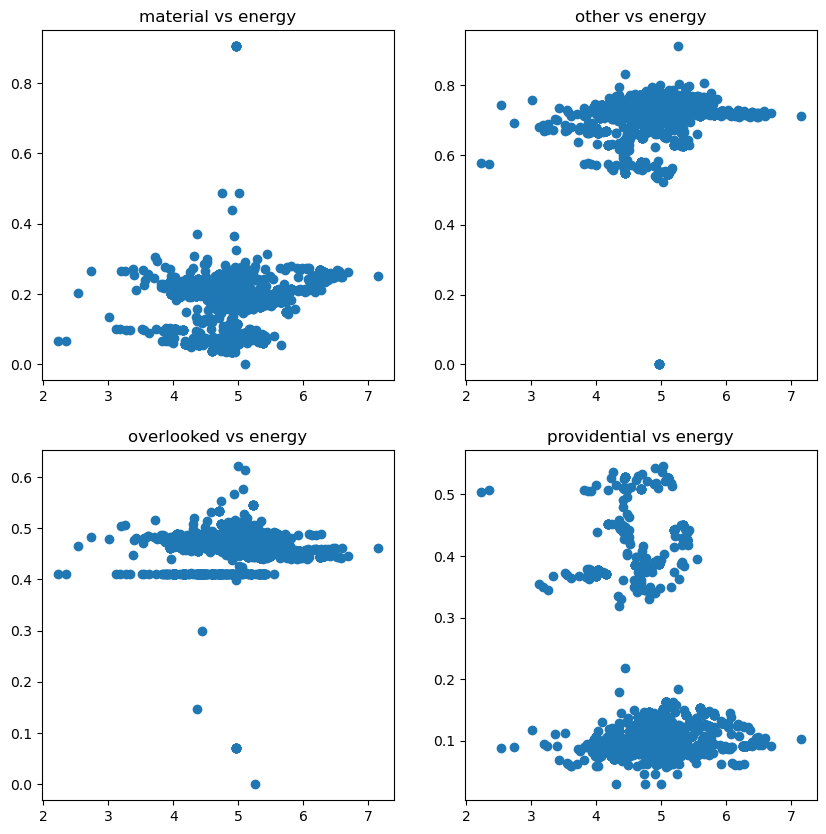

In [1447]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["material"])
axs[0, 0].set_title('material vs energy')
axs[0, 1].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["other"])
axs[0, 1].set_title('other vs energy')
axs[1, 0].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["overlooked"])
axs[1, 0].set_title('overlooked vs energy')
axs[1, 1].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["providential"])
axs[1, 1].set_title('providential vs energy')

Text(0.5, 1.0, 'foundational vs hale')

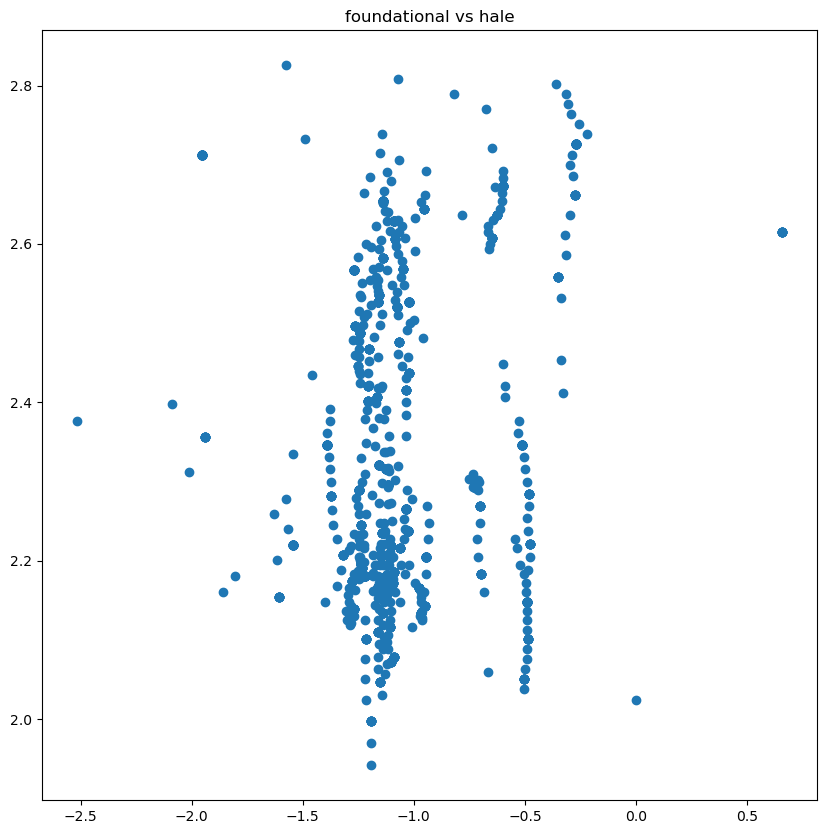

In [1448]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(foundational_df_transformed_accounts["foundational"], foundational_df_transformed_accounts["hale"])
axs.set_title('foundational vs hale')

Standardize by subtracting the mean and dividing by the standard deviation.

In [1449]:
from sklearn.preprocessing import StandardScaler

In [1450]:
variables_to_scale = ['material', 'other', 'overlooked', 'providential', 'foundational', 'nonfoundational', 'energy', 'ladder', 'socialsupport', 'hale', 'freedom', 'charity', 'corruption', 'positive', 'negative', 'education', 'wdi_hale', 'goveffectiveness', 'gini', 'hospitalbeds', 'infantmortality', 'rail', 'roadinjury', 'suicide', 'housing', 'communicable']
scaler = StandardScaler()
scaler_exiobase = StandardScaler()
foundational_df_transformed[variables_to_scale] = scaler.fit_transform(foundational_df_transformed[variables_to_scale])
foundational_df_transformed_exiobase[variables_to_scale] = scaler_exiobase.fit_transform(foundational_df_transformed_exiobase[variables_to_scale])

In [1451]:
%store scaler
%store scaler_exiobase

Stored 'scaler' (StandardScaler)
Stored 'scaler_exiobase' (StandardScaler)


Text(0.5, 1.0, 'transformed schoolenr vs energy')

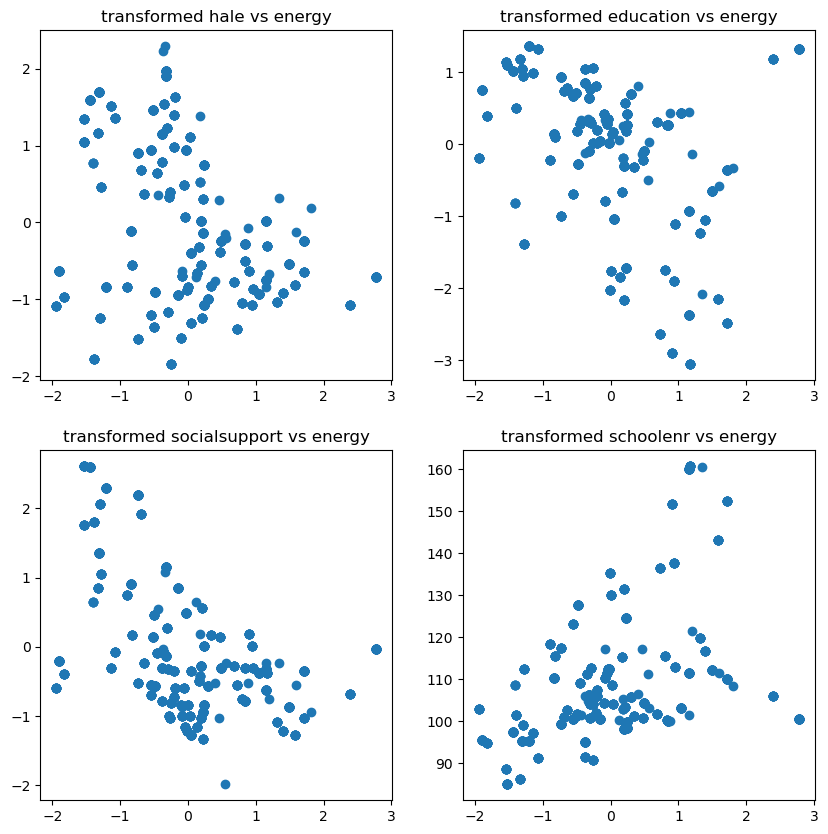

In [1452]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed schoolenr vs energy')

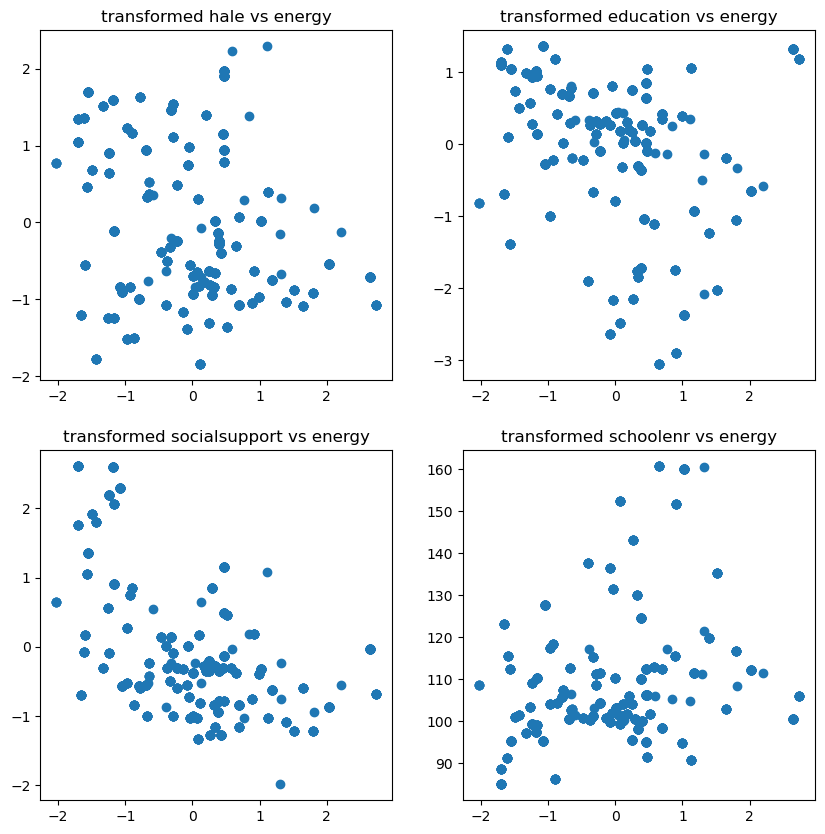

In [1453]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_exiobase["energy"], foundational_df_transformed_exiobase["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed rail vs energy')

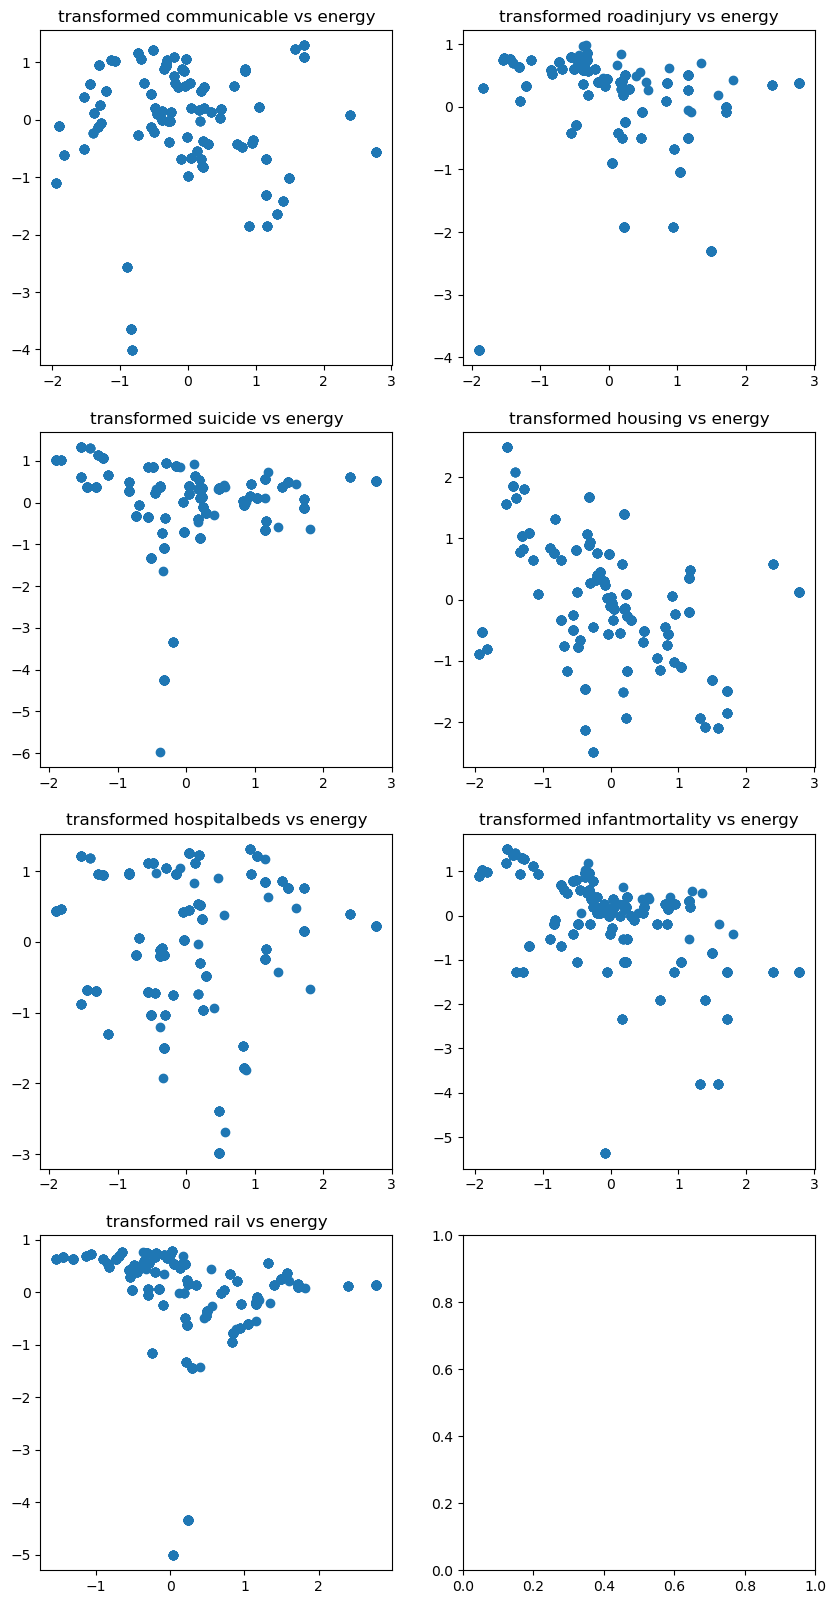

In [1454]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
axs[0, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["communicable"])
axs[0, 0].set_title('transformed communicable vs energy')
axs[0, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["roadinjury"])
axs[0, 1].set_title('transformed roadinjury vs energy')
axs[1, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["suicide"])
axs[1, 0].set_title('transformed suicide vs energy')
axs[1, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["housing"])
axs[1, 1].set_title('transformed housing vs energy')
axs[2, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["hospitalbeds"])
axs[2, 0].set_title('transformed hospitalbeds vs energy')
axs[2, 1].scatter(foundational_df_transformed["energy"], foundational_df_transformed["infantmortality"])
axs[2, 1].set_title('transformed infantmortality vs energy')
axs[3, 0].scatter(foundational_df_transformed["energy"], foundational_df_transformed["rail"])
axs[3, 0].set_title('transformed rail vs energy')

Same for accounts data

In [1455]:
scaler_accounts = StandardScaler()
scaler_accounts_exiobase = StandardScaler()
foundational_df_transformed_accounts[variables_to_scale] = scaler_accounts.fit_transform(foundational_df_transformed_accounts[variables_to_scale])
foundational_df_transformed_accounts_exiobase[variables_to_scale] = scaler_accounts_exiobase.fit_transform(foundational_df_transformed_accounts_exiobase[variables_to_scale])

Text(0.5, 1.0, 'transformed schoolenr vs energy')

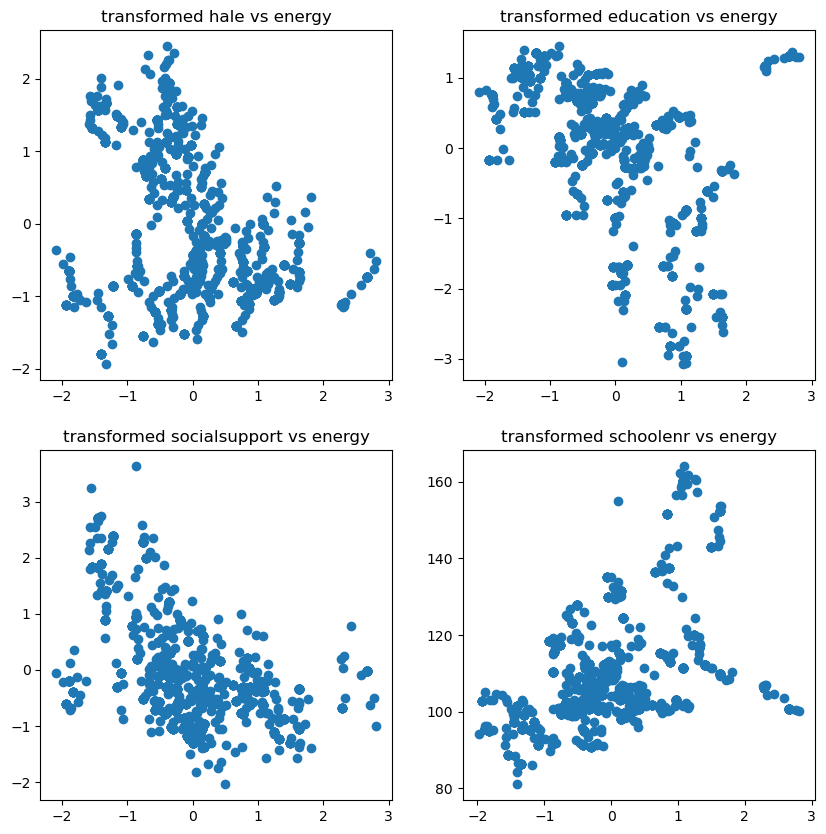

In [1456]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_accounts["energy"], foundational_df_transformed_accounts["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed schoolenr vs energy')

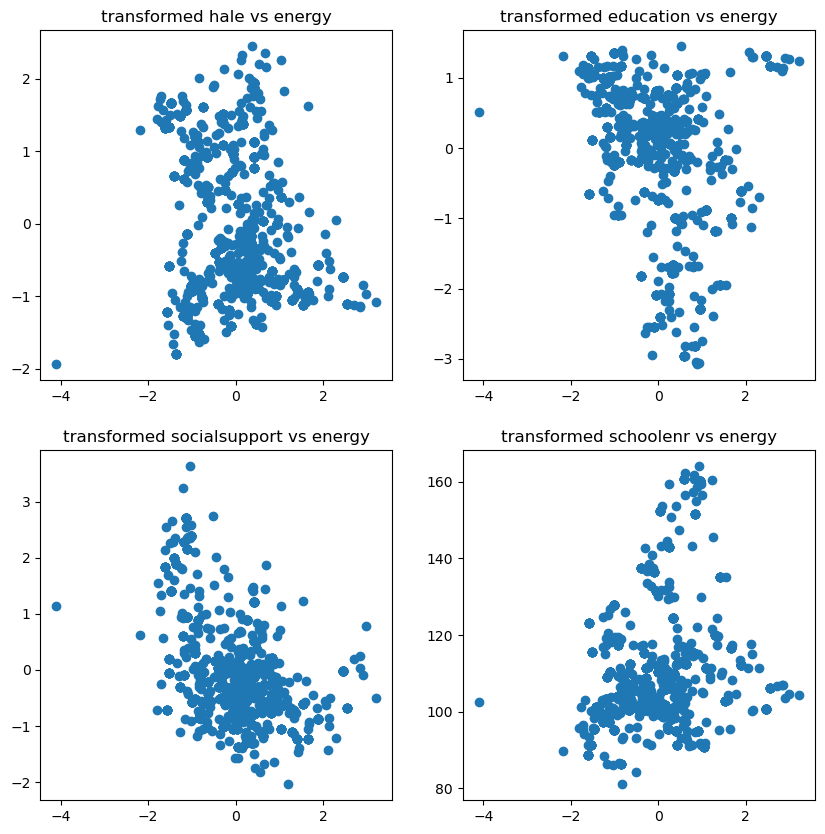

In [1457]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_accounts_exiobase["energy"], foundational_df_transformed_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

In [1458]:
scaler_df = pd.DataFrame({'variable': variables_to_scale, 'scale': scaler.scale_, 'mean': scaler.mean_})
scaler_df.to_csv('./output/scaler_values.csv', index=False)
scaler_df_exiobase = pd.DataFrame({'variable': variables_to_scale, 'scale': scaler_exiobase.scale_, 'mean': scaler_exiobase.mean_})
scaler_df_exiobase.to_csv('./output/scaler_values_exiobase.csv', index=False)

In [1459]:
scaler_df_accounts = pd.DataFrame({'variable': variables_to_scale, 'scale': scaler_accounts.scale_, 'mean': scaler_accounts.mean_})
scaler_df_accounts.to_csv('./output/scaler_values_accounts.csv', index=False)
scaler_df_accounts_exiobase = pd.DataFrame({'variable': variables_to_scale, 'scale': scaler_accounts_exiobase.scale_, 'mean': scaler_accounts_exiobase.mean_})
scaler_df_accounts_exiobase.to_csv('./output/scaler_values_accounts_exiobase.csv', index=False)

In [1460]:
foundational_df_transformed.head()

,geo,TIME_PERIOD,material,other,overlooked,providential,foundational,nonfoundational,energy,ladder,...,pop100k,rail,housing,education,dietaryrisks,unsafewater,nutrideficiencies,healthessential,goveffectiveness,gini
0,AT,2008,0.265969,1.453900,1.013891,-1.823854,-1.762548,1.776934,0.879648,0.879676,...,83.07368,-0.702035,NaN,0.441110,1.505473,7.873117,1.304469,NaN,1.023308,-0.319608
1,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.843457,1.122295,...,84.07717,-0.774844,-0.558352,0.266077,1.450216,7.989159,1.106406,81.0,0.674079,-0.292909
2,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.843457,1.122295,...,84.07717,-0.774844,-0.558352,0.266077,1.450216,7.989159,1.106406,81.0,0.674079,-0.292909
3,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.843457,1.122295,...,84.07717,-0.774844,-0.558352,0.266077,1.450216,7.989159,1.106406,81.0,0.674079,-0.292909
4,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.843457,1.122295,...,84.07717,-0.774844,-0.558352,0.266077,1.450216,7.989159,1.106406,81.0,0.674079,-0.292909


In [1461]:
foundational_df_transformed_exiobase.head()

,geo,TIME_PERIOD,material,other,overlooked,providential,foundational,nonfoundational,energy,ladder,...,pop100k,rail,housing,education,dietaryrisks,unsafewater,nutrideficiencies,healthessential,goveffectiveness,gini
0,AT,2008,0.265969,1.453900,1.013891,-1.823854,-1.762548,1.776934,0.119557,0.879676,...,83.07368,1.137516,NaN,0.441110,0.138273,0.000193,0.049106,NaN,1.023308,-0.319608
1,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.399040,1.122295,...,84.07717,1.218538,0.631306,0.266077,0.133791,0.000205,0.047559,81.0,0.674079,-0.292909
2,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.399040,1.122295,...,84.07717,1.218538,0.631306,0.266077,0.133791,0.000205,0.047559,81.0,0.674079,-0.292909
3,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.399040,1.122295,...,84.07717,1.218538,0.631306,0.266077,0.133791,0.000205,0.047559,81.0,0.674079,-0.292909
4,AT,2012,0.345018,1.649421,1.062289,-2.062012,-1.963526,1.955609,0.399040,1.122295,...,84.07717,1.218538,0.631306,0.266077,0.133791,0.000205,0.047559,81.0,0.674079,-0.292909


In [1462]:
foundational_df_no_transformations_exiobase.to_csv('./output/foundational_df_no_transformations_exiobase.csv', index=False)
foundational_df_no_transformations_accounts_exiobase.to_csv('./output/foundational_df_no_transformations_accounts_exiobase.csv')

In [1463]:
foundational_df_transformed.to_csv('./output/foundational_transformed.csv', index=False)
foundational_df_transformed_accounts.to_csv('./output/foundational_transformed_accounts.csv', index=False) 
foundational_df_transformed_exiobase.to_csv('./output/foundational_df_transformed_exiobase.csv', index=False)
foundational_df_transformed_accounts_exiobase.to_csv('./output/foundational_df_transformed_accounts_exiobase.csv', index=False) 

Check for multicollinearity by plotting independent variables against each other

In [1464]:
import seaborn as sns

/Users/supernaturval/miniconda3/envs/provisioning-model/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/supernaturval/miniconda3/envs/provisioning-model/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/supernaturval/miniconda3/envs/provisioning-model/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/supernaturval/miniconda3/envs/provisioning-model/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

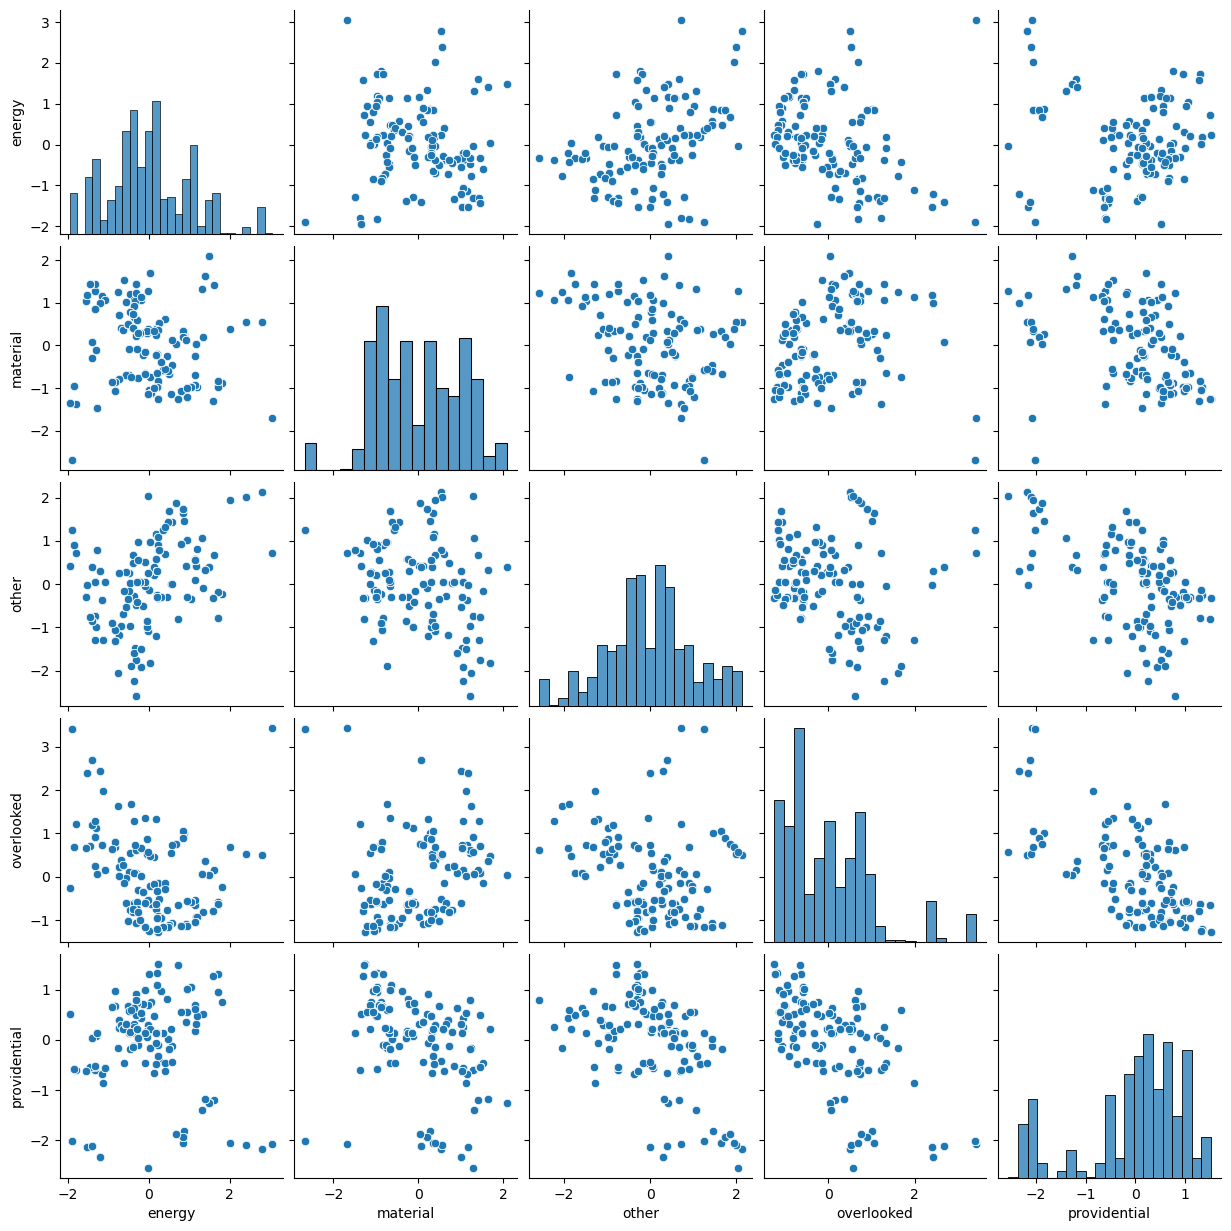

In [1465]:
sns.pairplot(foundational_df_transformed[["energy", "material", "other", "overlooked", "providential"]])

Looks like there mostly isn't an exact linear relationship between independent variables.
Combination of providential + other and providential + overlooked looks suspicious though, should avoid putting them into one regression.
Overlooked vs energy also looks suspicious, maybe it makes sense to exclude Overlooked from the regression entirely.

### Next step: conduct regressions! Open [regressions_v2.ipynb](regressions_v2.ipynb) to proceed